<a href="https://colab.research.google.com/github/JoDeMiro/FuzzyBevezetes/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_9_Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
#@title('Indítás után')
%%capture
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt


from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

from mpl_toolkits.mplot3d import Axes3D


## Bemutatkozás:

Az MTA SZTAKI-ban dolgozom és felhő alapú rendszerek optimális kihasználást tűztem ki célul, ezt szeretném
fuzzy logika alapján megvalósítani - úgy ítéltem meg, hogy a problémára tökéletes megoldás lehet a fuzzy rendszer = sok bemeneti változó alapján kell hozni egy olyan döntést, hogy hány erőforrást allokáljon a dinamikusan a rendszerhez. A bemeneti változók közötti kapcsolat nem lineáris és nem egyértelmű, hogy milyen kapcsolat van a bemeneti változók és kimeneti változó között (ami az erőforrások mennyisége, illetve az, hogy mennyi új erőforrást kell hozzáadni, vagy elvenni) tehát ez egy szabályozási feladat.


> minek alapján dolgoztam, a jegyzet bemutatása https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/ch14s07.html

###Pythonban
 dolgoztam, mert a program amiben implementálni szeretném a fuzzy rendszert pythonban fog megíródni mert külföldi kollaborációban készítjük a programot és elvárás, hogy a programkód pythonban legyen megírva.

- nem kellett teljesen az alapoktól kezdenem a programozást, mert kitűnő és széles körben támogatott fuzzy logic keretrendszerek vannak Pythonban is. (https://pythonhosted.org/scikit-fuzzy/overview.html)

- Másrészt motívációm volt, hogy azoknak is be lehessen mutatni a Fuzzy logika működését, akik nem férhen hozzáa **MathWork** programcsomaghoz.


- Az egész programot feltöltöttem egy <a href="https://github.com/JoDeMiro/FuzzyBevezetes" target="_blank">GitHub</a> repositoryba, ahonnan elérhető.

### ToDo
bemutatni, hogy mit nem csináltam még meg de tervbe van véve - [ToDo](#todo)

Az orovosi döntéstámogatás kapcsán el lehet mondani, hogy ebben én is érintett vagyok, mert van egy magas tumormarkerem, ami alapján további vizsgálatokra küldenek, de mivel a további vizsgálatok eredménye negatív ezért az kezelőorvosomnak valamilyen döntést kellett hoznia arról, hogy milyen kezelést javasol, vagy egyáltalán nincs szükség kezelésre (fals pozitív az eredmény)

# Fuzzy következtetési rendszerek

Ebben a részben a a fuzzy következtetési rendszerek bemutatásával foglalkozom.

Ez az interkatív bemutató a fuzzy következtetést egyes lépésein át muatatja be az alapfogalmakat.

A jegyzetet Dr. Prof. Takács Márta tanárnő - Fuzzy következtetési rendszerek című tantárgyához készítettem a 2021/2 félévben.


### A tantárgy tartalma:
Fuzzy operátorcsaládok áttekintése. A következtetési rendszerek logikai, fuzzy logikai alapjai.
Bizonytalanság kezelése a következtetési rendszerekben. Általános fuzzy következtetési rendszerek. Szabályalapú rendszerek. Mamdani és Takagi-Sugeno módszer. Grafikus megjelenítés MATLAB környezetben. Új operátorcsaládokon alapuló következtetési rendszerek. Mérnöki alkalmazásokban megjelenő döntési problémák numerikus módszerekkel történő megoldásának lehetőségei, és a fuzzy következtetési rendszerek alkalmazásának lehetőségei. Gazdasági alkalmazásokban alkalmazott fuzzy következtetési rendszerek. Környezetvédelmi és természettudományi alkalmazások. 

http://aidi.uni-obuda.hu/sites/default/files/OE_AIAMDI_t%C3%A1rgyle%C3%ADr%C3%A1sok_2021.febru%C3%A1r.pdf

<a name="tartalom"></a>

## Tartalom

Bevezetés

> [A lágy számítási módszerekről](#a_lagy_szamitasi_modszerekrol)<br>
> [Fuzzy halmazok](#fuzzy_halmazok)<br>
> [Fuzzy tagsági függvények](#fuzzy_tagsagi_fuggvenyek)<br>
> [Fuzzifikáció](#fuzzifikacio)<br>
> [Fuzzy metszetek](#fuzzy_metszetek)<br>
> [Fuzzy uniók](#fuzzy_uniok)<br>
> [Szabályalkotás](#szabalyalkotas)<br>
> [Aggregáció](#aggregacio)<br>
> [Defuzzifikáció](#defuzzifikacio)<br>
> Bevezető példa [Bevezető példa](#pelda1)<br>
> Második példa [Második példa](#pelda2)<br>
> Harmadik példa [Harmadik példa](#pelda3)<br>
> Kitekintés [Takagi-Sugeno rendszer](#takagi_sugeno_rendszer)<br>
> ToDo [ToDo](#todo)<br>
> Felhasznált irodalom [Felhasznált irodalom](#felhasznalt-irodalom)<br>





# Bevezetés

## A lágy számítási módszerekről

A 'kemény' számítási módszerekkel szemben a 'lágy' számítási módszerek nem éles szabályokat alkotnak, hanem egyfajta átmenetet képeznek  a bemenetek és a kimenet között.

A 'lágy' számítások ötletét Lofti Zadeh matematikus vetette fel. Elgondolása szerint:

> Az emberi gondolkodásmód sokkal jobban modellezhető olyan fogalmakkal, amelyeknek nincsenek éles határai.

Fuzzy annyit tesz magyarul, homályos, nem tiszta, elmosódott, bizonytalan. A homályos azt jelenti, hogy az átmenet egyik állapottól a másikba nem éles, hanem folyamatos, mint az árnyék, ha több fényforrás világít (több nézőpont), egyébként tiszta és egzakt rendszerek építhetőek fel elvei alapján.

> Az átmenet van igaz és hamis között. Bevezeti a részleges igazságtartalmat.

Számos tudományterület és alkalmazásban használhatunk lágy számítási módszereket az orvostudománytól, a társadalomtudományokon át{szociológia, közgazdaságtan}, képfeldolgozáson, kockázatkezelésen, gazdasági döntések meghozatalánál, komplex feladatok megoldásán át és az optimalizálás területén.


## Fuzzy logika és Fuzzy halmazok

A fuzzy rendszerek jellemzője, hogy minden megfigyelt jelenséghez ún. fuzzy halmazokat rendelünk hozzá, melyek nem számok, hanem emberi fogalmak. Ezekhez a fuzzy halmazokhoz tartozik egy tagsági függvény és egy szabályrendszer.

A fuzzy halmazokat egy példán keresztül lehet közelebb hozni az emberi gondolkodáshoz. Ha egy homokkupacból elveszek egy homokszemet akkor az még homokkupac, de minnél több homokszemet veszek el belőle annál kevésbé lesz homokkupac. Kérdés, mikortól nem tekintem homokkupacnak? Ebből látható, hogy az átmenet nem éles. Nem mondhatom, hogy előbb még homokkupac volt, de egy homokszem elvétele után már nem az. Az átmenet inkább folytonos és nem húzható éles határ.

## Mikor használjunk fuzzy következtetési rendszereket

Olyan rendszerekben, melyek folytonos bemenetekkel és nem lineáris kimeneti függvényekkel jellemezhetők. És/Vagy amikor sok tényező, szempont, bemenet alapján és ismeretében kell döntést hozznunk és a szempontok összetettek.





<a name="fuzzy_halmazok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy halmazok <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## A kétrétékű logikában
A halmazhoz tartozás egyértelműen eldönthető.

Legyen az A halmaz az X alalphalmaz egy részhalmaza, akkor a karakterisztikus függvény:

$$X_A:X \rightarrow \left\{ 0,1 \right\} $$
<br>
$$
X_A(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \in \mathbf{A} \\
        0 & \mbox{ha } \ x \notin \mathbf{A}
    \end{array}
\right.
$$

> részhalmaz
$\mathbf{A} \subset \mathbf{B}$ vagy $\mathbf{A} \subseteq \mathbf{B}$ és ha $\mathbf{A} \subseteq \mathbf{B}$ és $\mathbf{B} \subseteq \mathbf{A}$ akkor $\mathbf{A} = \mathbf{B}$

> valódi részhalmaznaz tekintjük, ha $\mathbf{B}$-nek létezik legalább egy eleme ami nem eleme $\mathbf{A}$-nak

> halmaz elemeinek száma $|\mathbf{A}|$

> halmaz komplemense $\mathbf{\overline{A}}$ az $\mathbf{A}$-ban nem szereplő elemek.

<br>

<a name="fuzzy_tagsagi_fuggvenyek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy tagsági függvény <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

A tagsági függvény segítségével tudjuk leírni, egy adott halmazhoz tartozás és nem tartozás közötti fokozatos átmenetet. Valamely $x \in X$ esetén a $\mu_A(x)$ azt fejezi ki, hogy $x$ milyen mértékig tarozik hozzá $A$ fuzzy halmazhoz.

Az alaphalmaz minden eleméhez valamilyen rögzített tartományból rendelünk értékekekt. Az érték nagysága arányos a halmazhoz tartozás mértékével. Ez az érték jellemzőn 0-1 között van.

### Fuzzy halmaz esetén
$h(A)$ a tagsági függvény suprémuma
$h(A) = \sup_{x \in X}A(x)$, ha a magassága. Ha $H(A) = 1$ akkor a fuzzy halmazt normálisnak nevezzük, ellenkező esetben $H(A) < 1$ akkoro szubnormálisnak.

A halmaz és a tagsági függvény egyenértékű<br>
Tagsági függvény: $\mu_A:X \rightarrow [0,1]$ éés Fuzzy halmaz: $A:X \rightarrow [0,1]$

Példák a leggyakrabban használt tagsági függvények típusokra.



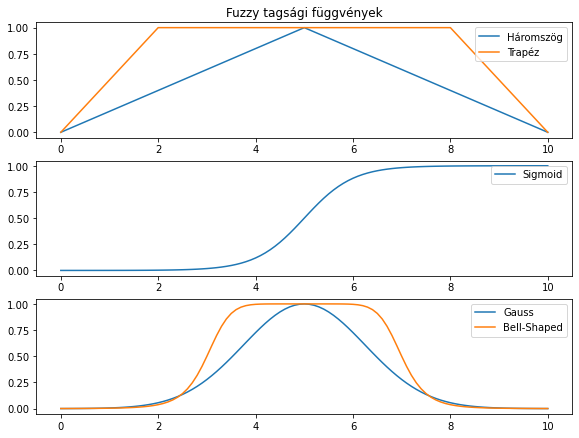

In [ ]:
#@title
import numpy as np
from matplotlib import pyplot as plt

# x = [0, 10]

step = 0.1
x = np.arange(0, 10.001, step)

# Háromszög tagsági függvény [a, b, c]
trimf = fuzzy.trimf(x, [0, 5, 10])

# Trapéz tagsági függvény (a, b, c, d)
trapmf = fuzzy.trapmf(x, [0, 2, 8, 10])

# Sigmoid tagsági függvény - (mean, sigma)
mean = 5.0
sigma = 2.0
sigmf = fuzzy.sigmf(x, mean, sigma)

# Gaussian function
mean = 5.0
sigma = 1.25
gaussmf = fuzzy.gaussmf(x, mean, sigma)

# Generalized Bell-Shaped function
width = 2.0
slope = 4.0
center = 5.0
gbellmf = fuzzy.gbellmf(x, width, slope, center)


fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))

# 3 sor, 1 oszlop
plt.subplot(311)
plt.title("Fuzzy tagsági függvények")
plt.plot(x, trimf, label="Háromszög")
plt.plot(x, trapmf, label="Trapéz")
plt.legend(loc="upper right")

plt.subplot(312)
plt.plot(x, sigmf, label="Sigmoid")
plt.legend(loc="upper right")

plt.subplot(313)
plt.plot(x, gaussmf, label="Gauss")
plt.plot(x, gbellmf, label="Bell-Shaped")
plt.legend(loc="upper right")

plt.show()


A fuzzy tagsági függvény előálítása (egy lehetséges példa) (trapéz)

$$
\mu_Ai(x) = \left\{
    \begin{array}\\
        0 & \mbox{ha } \ x \leq a_i \\
        \frac{x-a_i}{b_i-a_i} & \mbox{ha } \ a_i \leq x \leq b_i \\
        1 & \mbox{ha } \ b_i \leq x \leq c_i \\
        \frac{d_i-x}{d_i-c_i} & \mbox{ha } \ c_i \leq x \leq d_i \\
        0 & \mbox{ha } \ d_i \leq x
    \end{array}
\right.
$$

ahol, $a_i, b_i, c_i, d_i$ a tagsági függvény paraméterei.

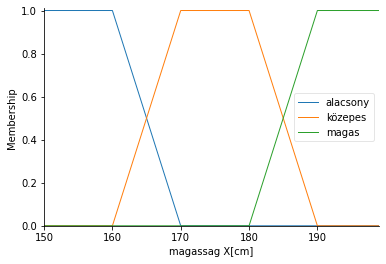

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets
import matplotlib.pyplot as plt

x                = np.arange(150, 200, 1)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

Fenti ábra, példa a Fuzzy tagsági függvényekre. Látható, hogy három tagsági függvény van a ’magassag’ változóhoz hozzárendelve, ahol minden egyes magasságértékhez hozzárendelünk 1 vagy 2 tagsági függvényt.

Az ’alacsony’ és a ’közepes’ tagsági függvény **Zadeh féle egyensúlyi pontja (0.5) x = 165** centiméternél van.

Az x = 175 centiméter például csak a ’közepes’ tagsági függvényhez tartozik és 1.0 értéket vesz fel.






## Fuzzy halmazok

Ha úgy itélik meg, hogy a tagsági függvény érték is túl precíz a valóságban, akkor az elemekhez a tagsági függvény érték helyett **intervallumot** rendelnek. Ez a módszer jeletősen növeli a számításigényt. Jelenleg nem foglalkozom ezzel a módszerrel, de hogy el tudjuk képzelni mit jelent ez, egy képpel tudom illusztrálni.



In [ ]:
(170-161) /(170-160)

0.9


<a name="fuzzifikacio"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzifikálás, Fuzzyfikáció <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Gyakorlatilag meghatározzuk a tagsági függvényeket, és az egyes crisp értékeket hozzájuk rendeljük. Alább a testmagasság egy lehetséges fuzzifikációja.

$A$ = {alacsony, közepes, magas}
<br>

$$
A_1(x) = \left\{
    \begin{array}\\
        1 & \mbox{ha } \ x \leq 150 \\
        \frac{170-x}{170-160} & \mbox{ha } \ 160 \leq x \leq 170 \\
        0 & \mbox{ha } \ 170 \leq x
    \end{array}
\right.
$$

Ezért $A_1(175) = (170-165) /(170-160) = 0.5$



Magassag['alacsony'](3) : 	0.50
Magassag['közepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


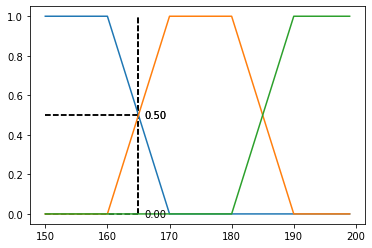

In [ ]:

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(165)

A fenti Python kód kiszámítja, hogy egy adott x érték melyik tagsági függvényen milyen értéket vesz fel és ezt grafikusan is ábrázolja. 
 
A példában a x = 165 centiméter az ’alacsony’ és a ’közepes’ tagságifüggvényhez is 0.5 értékben tartozik és 0.0 mértékben a ’magas’ tagságifüggvényhez. 

In [ ]:
interact(membershipDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), Output()), _dom_classes=('widg…

Ugyan ezen körülmények között az x = 168 érték az ’alacsony’ tf-en 0.2 a ’közepes’ tf-en 0.8 értéket vesz fel.

## Axiómák

A: az X fuzzy halmaza

Definíció szerint 𝑥 ∈ 𝑋-nek az A halmazhoz tartozásának mértéke: A(x)
Ekkor az A halmaz c típusú komplemense ca(x) az az érték, amilyen
mértékben x nem tartozik A-hoz. A Fuzzy komplemens: 𝑐: 0,1 → 0,1 függvény ∀𝐴(𝑥) tagsági függvény értékhez tetszőleges „A” fuzzy halmaz esetén a 𝑐 𝐴 𝑥 értéket rendeli hozzá.

$c1$ axióma: $c(0) = 1$ és $c(1) = 0$ (peremfeltétel)

$c2$ axióma: $\forall, b \in [0,1]$ esetén
ha $a \leq b$ akkor $c(a) \geq c(b)$ (monotonitás)

$c2$ azt írja elő, hogy a komplemens monoton csökkenő legyen: az $A$ halmaz
tagsági függvény értékének növekedésével a komplemens $c(a)$ értéke nem
nőhet.

**Egyensúlyi pont**: az az $a$ érték amire $c(a) = a$
Zadehnél $a = 0.5$ az egyensúlyi pont.

<br>

<a name="fuzzy_metszetek"></a>

[vissza a tartalomhoz](#tartalom)

## Fuzzy metszetek (A t-normák)

A fuzzy metszetek minimálisan elvárt tulajdonságait axiómák fogalmazzák meg, amelyek a Boole metszet fogalom természtes általánosítását adják.

$$t: [0,1] \times [0,1] \rightarrow [0,1]$$

$t_1$ axióma: $(t(a,1) = a, \forall a \in [0,1]$-re (peremfeltétel)

$t_2$ axióma: $b \leq c$-ből következik, hogy $t(a,b) \leq t(a,c), \forall a, b,c \in [0,1]$ (monotonitás)

$t_3$ axióma: $(t(a,b) = t(b,a), \forall a,b \in [0,1]-$-re (kommutativitás)

$t_4$ axióma: $(t(a,t(b,c)) = t(t((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativitás)

<br>

$t_2$ és $t_3$ azt a követelményt fejezi ki, hogy ha $A$-ban vagy $B$-ben a tagsági érték csökken, az nem eredményezheti a metszet $A \cap B$ növekedését.

<br>

Zadeh-féle metszet:

$$ t(a,b) = min(a,b) $$

Algebrai szorzat:

$$ t(a,b) = ab $$

Korlátos különbség:

$$ t(a,b) = max(0,a+b-1) $$

Példák:






Magassag['alacsony'](3) : 	0.50
Magassag['közepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


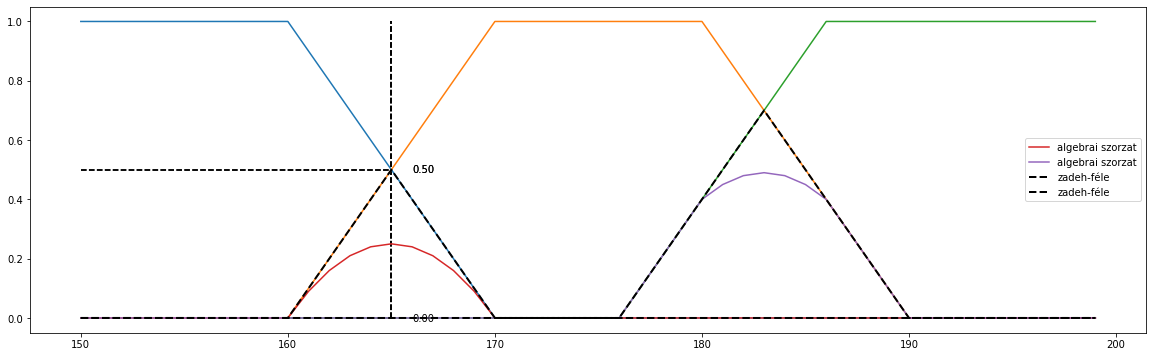

In [ ]:



#@title
def membershipANDDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  algebrai = np.asarray(container[0])*np.asarray(container[1])
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  algebrai = np.asarray(container[1])*np.asarray(container[2])
  plt.plot(x, algebrai, label = 'algebrai szorzat')


  # zadeh féle fuzzy metszet
  zadeh = np.minimum(np.asarray(container[0]),np.asarray(container[1]))
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')

  zadeh = np.minimum(np.asarray(container[1]),np.asarray(container[2]))
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')



  plt.legend()

membershipANDDemo(165, 176, 186)

In [ ]:
interact(membershipANDDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti…


<a name="fuzzy_uniok"></a>

[vissza a tartalomhoz](#tartalom)

# Fuzzy uniók (t-kononrmák)

A fuzzy uniók minimálisan elvárt tulajdonságait axiómák fogalmazzák meg.

$$s: [0,1] \times [0,1] \rightarrow [0,1]$$

$s_1$ axióma: $(s(a,1) = a, \forall a \in [0,1]$-re (peremfeltétel)

$s_2$ axióma: $b \leq c$-ből következik, hogy $s(a,b) \leq s(a,c), \forall a, b,c \in [0,1]$ (monotonitás)

$s_3$ axióma: $(s(a,b) = s(b,a), \forall a,b \in [0,1]-$-re (kommutativitás)

$s_4$ axióma: $(s(a,s(b,c)) = s(s((a,b)c), \forall a,b,c \in [0,1]-$-re (asszociativitás)


<br>

Zadeh-féle unió:

$$ s(a,b) = max(a,b) $$

Algebrai összeg:

$$ s(a,b) = a + b - ab $$

Korlátos összeg:

$$ s(a,b) = min(1,a+b) $$

Példák:



Magassag['alacsony'](3) : 	0.50
Magassag['közepes'](3) : 	0.50
Magassag['magas'](3) : 	0.00


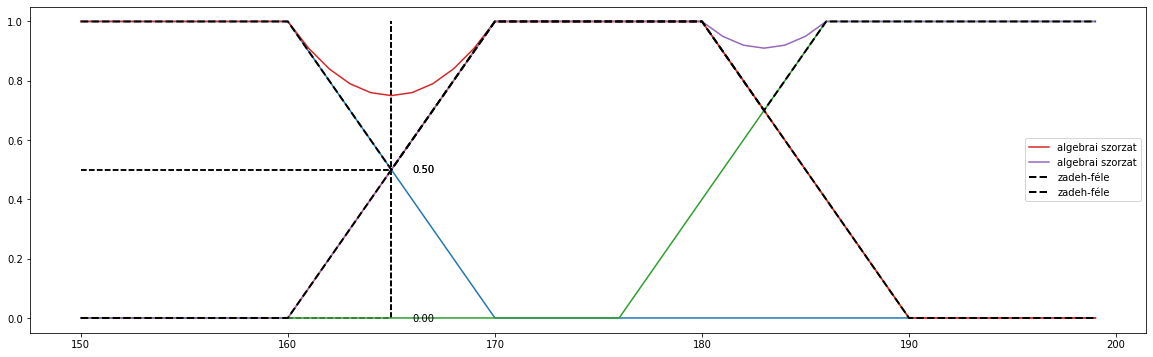

In [ ]:
#@title
def membershipORDemo(x_, a1, a2):

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

  Magassag.defuzzify_method = 'centroid'
  Magassag.universe.mean()

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [a1, a2, 200, 200])

  plt.rcParams["figure.figsize"] = (20,6)
  container = []
  for key in Magassag.terms.keys():
    x = np.arange(150, 200, 1)
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

    container.append(Magassag[key].mf)


  # albebrai szorzat
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  algebrai = (a+b)-(a*b)
  plt.plot(x, algebrai, label = 'algebrai szorzat')

  # zadeh féle fuzzy metszet
  a = np.asarray(container[0])
  b = np.asarray(container[1])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')

  a = np.asarray(container[1])
  b = np.asarray(container[2])
  zadeh = np.maximum(a,b)
  plt.plot(x, zadeh, label = 'zadeh-féle', color='black', lw = 2, linestyle='dashed')

  plt.legend()

membershipORDemo(165, 176, 186)

In [ ]:
interact(membershipORDemo, x_=widgets.IntSlider(min=150, max=200, step=1, value=168), a1=widgets.IntSlider(min=150, max=200, step=1, value=176), a2=widgets.IntSlider(min=185, max=200, step=1, value=186));

interactive(children=(IntSlider(value=168, description='x_', max=200, min=150), IntSlider(value=176, descripti…


<a name="aggregacio"></a>

[vissza a tartalomhoz](#tartalom)

# Aggregáció

Több fuzzy halmaz megfelelő módon történő egyesítése által egyetlen fuzzy
halmazt állítanak elő.

$$h[0,1]^n \rightarrow [0,1], n \geq 2$$

Ha a $h$ függvény argumentumai az X alaphalmazon értelmezett $A_1(x), ..., A_n(x)$ fuzzy halmazok, akkor $h \forall x \in X$-re fuzzy halmazt állít elő az argumentumok tagsági értékeinek segítségével,

$$A(x) = h(A_1(x), ..., A_n(x))$$

Gyakorlatban ezt úgy érjük el, hogy szabályok konstruálunk és végül az összes szabály alapján előállítjuk az új fuzzy halmazokat.

# Az implikáció annyiban különbözik,

Az agregációtól, hogy egy változón létrehozott tagsági függvények értékeinek kiszámítására használja a szakirodalom az implikáció szót.

Míg az aggregáció az összes változóra érvényes szabály alapján létrehozott értékek előállítására és új fuzzy halmazhoz rendelésére használják.


Magassag['alacsony'](3) : 	0.80
Magassag['közepes'](3) : 	0.20
Magassag['magas'](3) : 	0.00


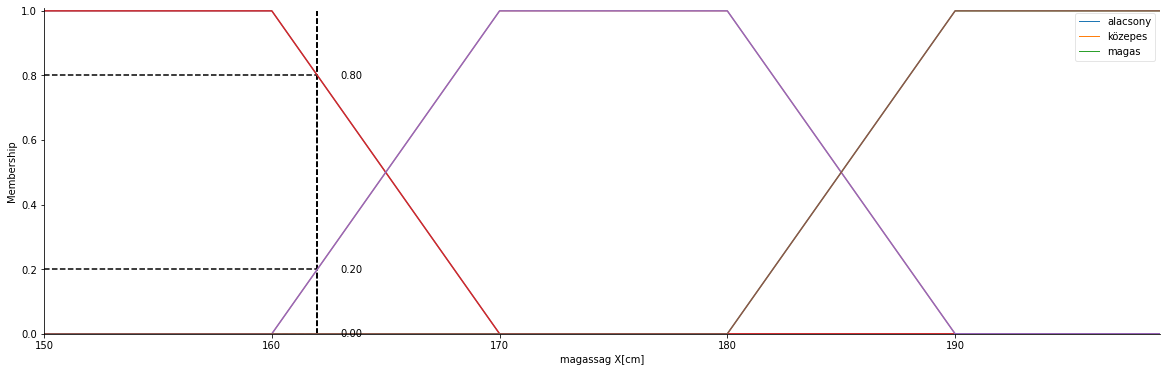

In [ ]:
#@title


Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

Magassag.defuzzify_method = 'centroid'
Magassag.universe.mean()

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Magassag.view()

def membershipDemo(x_):
  for key in Magassag.terms.keys():
    plt.plot(x, Magassag[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 150, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

membershipDemo(162)

Testtomeg['sovány'](3) : 	0.30
Testtomeg['közepes'](3) : 	0.70
Testtomeg['kövér'](3) : 	0.00


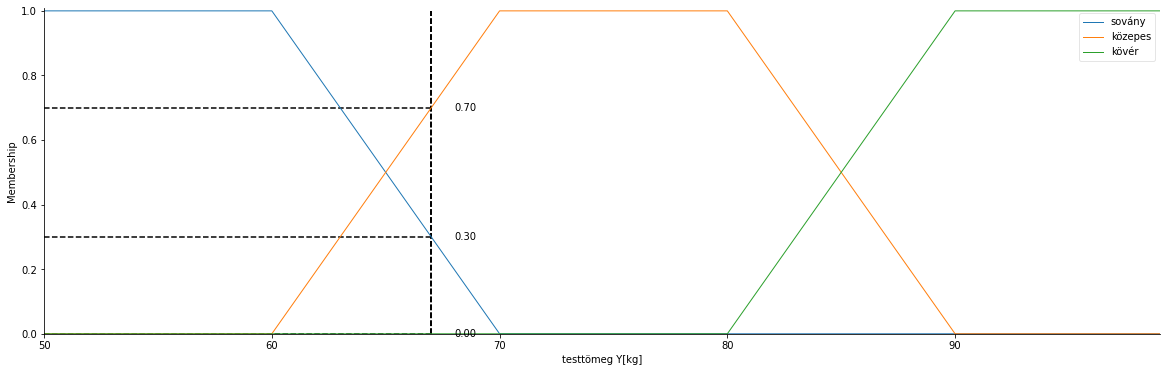

In [ ]:
#@title

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtömeg Y[kg]')

Testtomeg.defuzzify_method = 'centroid'
Testtomeg.universe.mean()

Testtomeg['sovány'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['közepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['kövér'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Testtomeg.view()

def testtomegDemo(x_):
  for key in Testtomeg.terms.keys():
    plt.plot(x, Testtomeg[key].mf)

    xv = x_

    value = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

    plt.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    plt.hlines(value, xmin = 50, xmax = xv, colors = 'k', linestyles = 'dashed')
    plt.text(xv+1, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')

testtomegDemo(67)




A két fenti fuzzy halmaz egy lehetséges aggregációja



In [ ]:
#@title
Allapot         = ctrl.Antecedent(np.arange(0, 40, 1), 'állapot subjektív pontszám')

Allapot.defuzzify_method = 'centroid'
Allapot.universe.mean()

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['normális'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['túlsúlyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])

# Allapot.view()

In [ ]:
#@title
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])


In [ ]:
magasság = 166
testtömeg = 88

Magassag['alacsony'](3) : 	0.40
Magassag['közepes'](3) : 	0.60
Magassag['magas'](3) : 	0.00
Testtomeg['sovány'](3) : 	0.00
Testtomeg['közepes'](3) : 	0.20
Testtomeg['kövér'](3) : 	0.80
IF magassag[magas] AND testtomeg[sovány] THEN allapot[anorexia]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[sovány] THEN allapot[normális]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[közepes] AND testtomeg[közepes] THEN allapot[normális]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[magas] AND testtomeg[kövér] THEN allapot[normális]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF magassag[alacsony] AND testtomeg[kövér] THEN allapot[túlsúlyos]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
Állapot  : 27.17424242424242
----------------------------------------
magassag : 166
testtomeg : 88



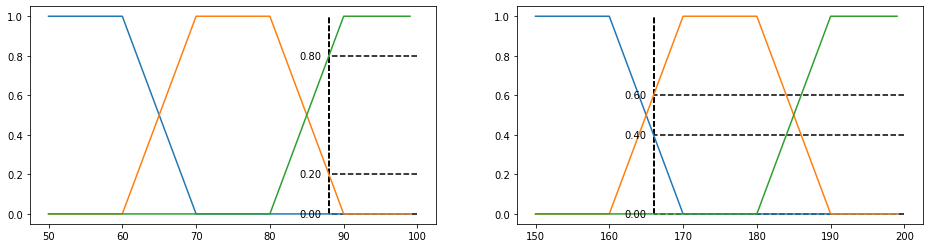

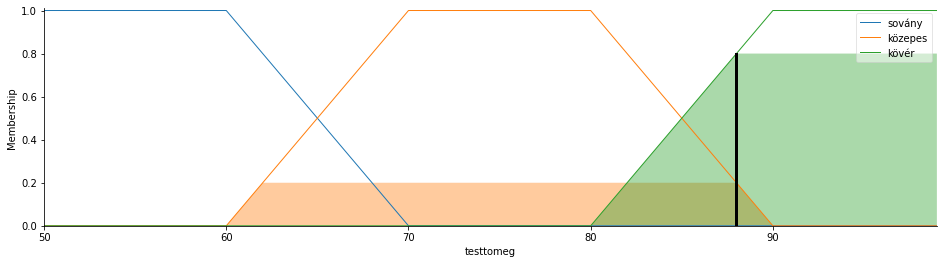

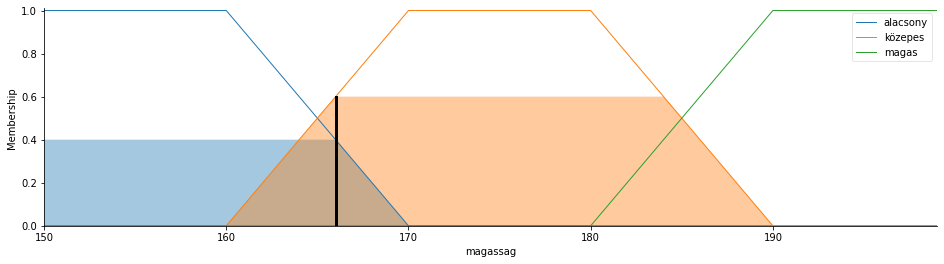

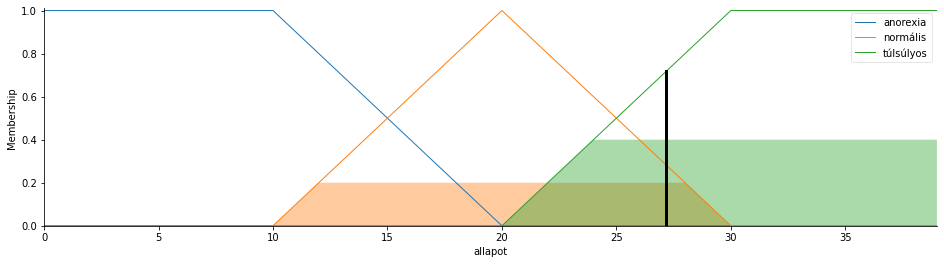

In [ ]:
#@title

plt.rcParams["figure.figsize"] = (16,4)

Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

Testtomeg['sovány'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
Testtomeg['közepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
Testtomeg['kövér'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
Allapot['normális'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
Allapot['túlsúlyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])



# rules
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)


def testtomegDemo(x1_):

  x1 = np.arange(50, 100, 1)

  for key in Testtomeg.terms.keys():
    ax1.plot(x1, Testtomeg[key].mf)

    xv = x1_

    value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

    print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

    ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



#---------------------------------------------------------------------------


def magassagDemo(x2_):

  x2 = np.arange(150, 200, 1)

  for key in Magassag.terms.keys():
    ax2.plot(x2, Magassag[key].mf)

    xv = x2_

    value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

    print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

    ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
    ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
    ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


magassagDemo(magasság)

testtomegDemo(testtömeg)

#---------------------------------------------------------------------------


# a szabályok
print(rule1)
print(rule2)
print(rule3)
print(rule4)
print(rule5)

# két szabályunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['magassag'] = magasság
simulation.input['testtomeg'] = testtömeg

simulation.compute()

print('----------------------------------------')
print('Állapot  :', simulation.output['allapot'])
print('----------------------------------------')
print(simulation.input)


Testtomeg.view(sim = simulation)
Magassag.view(sim = simulation)
Allapot.view(sim = simulation)


In [ ]:
#@title
def demo(a1, a2, px=16, py=4):
  plt.rcParams["figure.figsize"] = (px,py)

  magasság = a1
  testtömeg = a2

  Magassag         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag')

  Magassag['alacsony'] = fuzzy.trapmf(Magassag.universe, [150, 150, 160, 170])
  Magassag['közepes'] = fuzzy.trapmf(Magassag.universe, [160, 170, 180, 190])
  Magassag['magas'] = fuzzy.trapmf(Magassag.universe, [180, 190, 200, 200])

  Testtomeg         = ctrl.Antecedent(np.arange(50, 100, 1), 'testtomeg')

  Testtomeg['sovány'] = fuzzy.trapmf(Testtomeg.universe, [50, 50, 60, 70])
  Testtomeg['közepes'] = fuzzy.trapmf(Testtomeg.universe, [60, 70, 80, 90])
  Testtomeg['kövér'] = fuzzy.trapmf(Testtomeg.universe, [80, 90, 100, 100])

  Allapot         = ctrl.Consequent(np.arange(0, 40, 1), 'allapot')

  Allapot['anorexia'] = fuzzy.trapmf(Allapot.universe, [0, 0, 10, 20])
  Allapot['normális'] = fuzzy.trimf(Allapot.universe, [10, 20, 30])
  Allapot['túlsúlyos'] = fuzzy.trapmf(Allapot.universe, [20, 30, 40, 40])


  # rules
  rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

  rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
  rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
  rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

  rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])


  # plot
  fig, (ax1, ax2) = plt.subplots(1, 2)


  def testtomegDemo(x1_):

    x1 = np.arange(50, 100, 1)

    for key in Testtomeg.terms.keys():
      ax1.plot(x1, Testtomeg[key].mf)

      xv = x1_

      value1 = fuzzy.interp_membership(Testtomeg.universe, Testtomeg.__getitem__(key).mf, [xv])

      # print("Testtomeg['{0}'](3) : \t{1:0.2f}".format(key, value1[0]))

      ax1.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax1.hlines(value1, xmin = 100, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax1.text(xv-1, value1[0], '{:0.2f}'.format(value1[0]), verticalalignment = 'center', horizontalalignment = 'right')



  #---------------------------------------------------------------------------


  def magassagDemo(x2_):

    x2 = np.arange(150, 200, 1)

    for key in Magassag.terms.keys():
      ax2.plot(x2, Magassag[key].mf)

      xv = x2_

      value2 = fuzzy.interp_membership(Magassag.universe, Magassag.__getitem__(key).mf, [xv])

      # print("Magassag['{0}'](3) : \t{1:0.2f}".format(key, value2[0]))

      ax2.vlines(xv, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
      ax2.hlines(value2, xmin = 200, xmax = xv, colors = 'k', linestyles = 'dashed')
      ax2.text(xv-1, value2[0], '{:0.2f}'.format(value2[0]), verticalalignment = 'center', horizontalalignment = 'right')


  magassagDemo(magasság)

  testtomegDemo(testtömeg)

  #---------------------------------------------------------------------------


  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['magassag'] = magasság
  simulation.input['testtomeg'] = testtömeg

  simulation.compute()

  # print('----------------------------------------')
  # print('Állapot  :', simulation.output['allapot'])
  # print('----------------------------------------')
  # print(simulation.input)


  Testtomeg.view(sim = simulation)
  Magassag.view(sim = simulation)
  Allapot.view(sim = simulation)

  return simulation

In [ ]:
#@title
a1 = widgets.IntSlider(min=150, max=200, step=1, value=166)
a2 = widgets.IntSlider(min=50, max=100, step=1, value=88)
px = widgets.IntSlider(min=8, max=15, step=1, value=11)
py = widgets.IntSlider(min=2, max=10, step=1, value=3)

ui = widgets.HBox([a1, a2, px, py])

out = widgets.interactive_output(demo, {'a1': a1, 'a2': a2, 'px': px, 'py': py})

display(ui, out)


Output()

## Aggregáció (folyt.)

A fenti példában láthatjuk , hogy A1(testtömeg) és A2(magasság) együttesen adták a hozzárendelési szabályokat.


```
rule1 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['sovány'], consequent = Allapot['anorexia'])

rule2 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['sovány'], consequent = Allapot['normális'])
rule3 = ctrl.Rule(antecedent= Magassag['közepes'] & Testtomeg['közepes'], consequent = Allapot['normális'])
rule4 = ctrl.Rule(antecedent= Magassag['magas'] & Testtomeg['kövér'], consequent = Allapot['normális'])

rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])
```

Most csak az 5 szabályt figyelembe véve nézzük meg, hogy mi a hozzárendelési szabály és hogyan alakul az értékük.

```
rule5 = ctrl.Rule(antecedent= Magassag['alacsony'] & Testtomeg['kövér'], consequent = Allapot['túlsúlyos'])
```

Ha magasság = ‘alacsony’ és testtömeg = ‘kövér’, akkor hozzárendelés ‘túlsúlyos’. De milyen tagságifüggvény értéket fog kapni a ‘túlsúlyos’ tf? 

Ennek kiszámításához tekintsük át, hogy az adott szabályhoz (rule5) tartozó változók között milyen hozzárendelési szabály van (és, vagy {min, max}) illetve, hogy milyen értéket vesznek fel. Ugyanis ezek alapján fogjuk kiszámolni, hogy milyen értéket kap a kimeneti halmazon az adott x érték 

$\mu(X_{1_1} = 166) = 0.4$ magasság, alacsony

$\mu(X_{1_2}= 166) = 0.6$ magasság, közepes

$\mu(X_{1_3}= 166) = 0.0$ magasság, magas

$\mu(X_{2_1}= 166) = 0.0$ testtömeg, sovány

$\mu(X_{2_1}= 166) = 0.2$ testtömeg, közepes

$\mu(X_{2_2}= 166) = 0.8$ testtömeg, kövér

Csak a 5. hozzárendelési szabályra tekintve 

```
rule5 = Magassag['alacsony'](0.4) & Testtomeg['kövér'](0.8) -> Allapot['túlsúlyos']) 
```
A két változó közötti ‘&’ ‘AND’ logika miatt a két érték közül a minimumot vesszük. Ha ez a logikai kapcsoló ‘|’ ‘OR’ lenne, akkor a két érték közül a nagyobbat vesszük figyelembe – de most nem ez a helyzet, ezért az Állapot halmaz ‘túlsúlyos’ tagsági függvényéhez a 0.4 értéket rendeljük hozzá. 



$$w_1 = max(0.4, 0.8) = 0.4$$

Van egy másik szabály is, amely hozzárendelést állít elő a magasság = 166, testtömeg = 88 bemeneti változók alapján. Ez pedig a 3. hozzárendelési szabály: 

```
rule3 =  Magassag['közepes'](0.6) & Testtomeg['közepes'](0.2) -> Allapot['normális']) 
```

$$w_2 = max(0.6, 0.2) = 0.2$$, az Állapot változó 'normális' tagsági függvényéhez tartozó érték.

Ha megfigyeljük a fenti ábrát ‘narancssárga’ szín jelöli a ‘normális’ tagsági függvényhez tartozó súlyt (0.2), és ‘zöld’ színnel jelöltem a ‘túlsúlyos’ tagságifüggvényhez tartozó súlyt (0.4). 








# ToDo ezt az ábrát át kell alakítanom úgy, hogy a fenti számítás kijöjjön

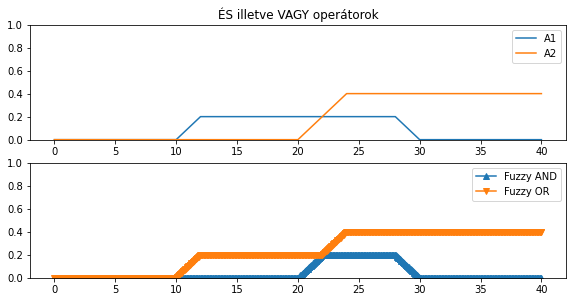

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzzy
from matplotlib import pyplot as plt

# x = [0, 10]
step = 0.05
x = np.arange(0, 40.001, step)

# Háromszög tagsági függvény
x1 = np.arange(0, 40.001, step)
trimf = fuzzy.trimf(x1, [10, 20, 30])
trimf = np.minimum(trimf, 0.2)

# Trapéz tagságifüggvény
x2 = np.arange(0, 40.001, step)
trapmf = fuzzy.trapmf(x2, [20, 30, 40, 40])
trapmf = np.minimum(trapmf, 0.4)


# 1 - tagságifüggvény
tri_not = fuzzy.fuzzy_not(trimf)
trap_not = fuzzy.fuzzy_not(trapmf)

# És/Vagy operátorok a két tagságifüggvényen
x3, tri_trap_and = fuzzy.fuzzy_and(x1, trimf, x2, trapmf)
x3, tri_trap_or = fuzzy.fuzzy_or(x1, trimf, x2, trapmf)

# Megjelenítés
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))

plt.subplot(3, 1, 1)
plt.title("ÉS illetve VAGY operátorok")
plt.plot(x1, trimf, label="A1")
plt.plot(x2, trapmf, label="A2")
plt.legend(loc="upper right")
plt.ylim(0,1)

plt.subplot(3, 1, 2)
plt.plot(x3, tri_trap_and, label="Fuzzy AND", marker="^")
plt.plot(x3, tri_trap_or, label="Fuzzy OR", marker="v")
plt.legend(loc="upper right")
plt.ylim(0,1)

plt.show() # +36 1 279 6064 lab

# Defuzzifikáció

A tagsági függvényekhez tartozó [0, 1] értéke folytonos értékekké alakítása.

$$ y = \sum_{i=1}^{n}w_i*Y_B$$

Ahol $Y_B$ az aggregáció után kapott kimeneti halmaz.

In [ ]:
mfx1 = Allapot.__getitem__('normális').mf
mfx2 = Allapot.__getitem__('túlsúlyos').mf

mx  = np.arange(0, mfx1.size, 1)

defuzzification1_centroid = fuzzy.defuzz(mx, mfx1, 'centroid')
defuzzification2_centroid = fuzzy.defuzz(mx, mfx2, 'centroid')

print('cog[normális]  =', defuzzification1_centroid)
print('cog[túlsúlyos]  =', defuzzification2_centroid)

# Állapot = w1 * COG(Állapot['anorixia']) + w2 * COG(Állapot['normális']) + w3 * COG(Állapot['túlsúlyos']) / (w1 + w2 + w3)

# Állapot = ( 0.0 * 5 + 0.2 * 20 + 0.4 * 25 ) / ( 0.0 + 0.2 + 0.4 )

# Állapot = 27.80

result = ( 0.0 * 5 + 0.2 * defuzzification1_centroid + 0.4 * defuzzification2_centroid ) / ( 0.0 + 0.2 + 0.4 )

print(result)


cog[normális]  = 19.999999999999996
cog[túlsúlyos]  = 31.702380952380953
27.801587301587297


In [ ]:
simulation.output

OrderedDict([('allapot', 27.17424242424242)])

<a name="pelda1"></a>

[vissza a tartalomhoz](#tartalom)

# Bevezető példa

Egy nagyon egyszerű példával kezdek, hogy jobban megérhetőek legyenak a fogalmak.

alacsony tagsági érték   =  0.0
közepes tagsági érték    =  0.2
nagyvonalú tagsági érték =  0.8
activation alacsony =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
activation közép =  [0.  0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.1 0. ]
activation nagyvonalú =  [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7
 0.8 0.8 0.8]


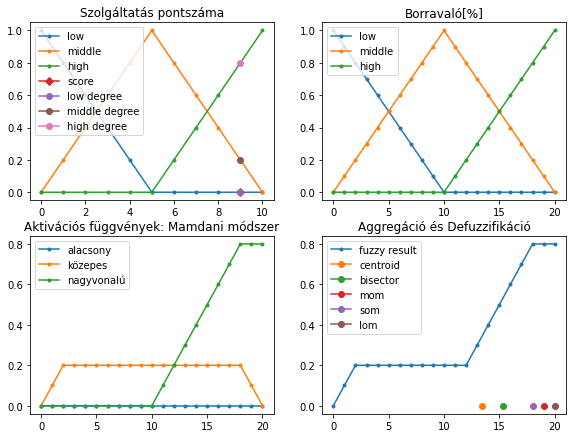

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

# Problem: from service quality to tip amount
x_service = np.arange(0, 10.001, 1.0)
x_tip = np.arange(0, 20.001, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])

tip_low = fuzz.trimf(x_tip, [0, 0, 10])
tip_middle = fuzz.trimf(x_tip, [0, 10, 20])
tip_high = fuzz.trimf(x_tip, [10, 20, 20])

# Input: service score
score = 9.0
low_degree = fuzz.interp_membership(x_service, service_low, score)
middle_degree = fuzz.interp_membership(x_service, service_middle, score)
high_degree = fuzz.interp_membership(x_service, service_high, score)
print('alacsony tagsági érték   = ', low_degree)
print('közepes tagsági érték    = ', middle_degree)
print('nagyvonalú tagsági érték = ', high_degree)

# Whole config
fig_scale = 1.5
plt.figure(figsize=(6.4 * fig_scale, 4.8 * fig_scale))
row = 2
col = 2

plt.subplot(row, col, 1)
plt.title("Szolgáltatás pontszáma")
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_middle, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(score, 0.0, label="score", marker="D")
plt.plot(score, low_degree, label="low degree", marker="o")
plt.plot(score, middle_degree, label="middle degree", marker="o")
plt.plot(score, high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Borravaló[%]")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high
activation_low = np.fmin(low_degree, tip_low)
activation_middle = np.fmin(middle_degree, tip_middle)
activation_high = np.fmin(high_degree, tip_high)

plt.subplot(row, col, 3)
plt.title("Aktivációs függvények: Mamdani módszer")
plt.plot(x_tip, activation_low, label="alacsony", marker=".")
plt.plot(x_tip, activation_middle, label="közepes", marker=".")
plt.plot(x_tip, activation_high, label="nagyvonalú", marker=".")
plt.legend(loc="upper left")

print('activation alacsony = ', activation_low)
print('activation közép = ', activation_middle)
print('activation nagyvonalú = ', activation_high)

# Apply the rules:
# * max for aggregation, like or the cases
aggregated = np.fmax(
    activation_low,
    np.fmax(activation_middle, activation_high))

# Defuzzification
tip_centroid = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_bisector = fuzz.defuzz(x_tip, aggregated, 'bisector')
tip_mom = fuzz.defuzz(x_tip, aggregated, "mom")
tip_som = fuzz.defuzz(x_tip, aggregated, "som")
tip_lom = fuzz.defuzz(x_tip, aggregated, "lom")

plt.subplot(row, col, 4)
plt.title("Aggregáció és Defuzzifikáció")
plt.plot(x_tip, aggregated, label="fuzzy result", marker=".")
plt.plot(tip_centroid, 0.0, label="centroid", marker="o")
plt.plot(tip_bisector, 0.0, label="bisector", marker="o")
plt.plot(tip_mom, 0.0, label="mom", marker="o")
plt.plot(tip_som, 0.0, label="som", marker="o")
plt.plot(tip_lom, 0.0, label="lom", marker="o")
plt.legend(loc="upper left")

plt.show()

<a name="pelda2"></a>

[vissza a tartalomhoz](#tartalom)

# Példa 2

IF cpu[alacsony] OR ram[alacsony] THEN change[decrease]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF cpu[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ram[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
change  : 1.7559614442375242
----------------------------------------
cpu : 80
ram : 40



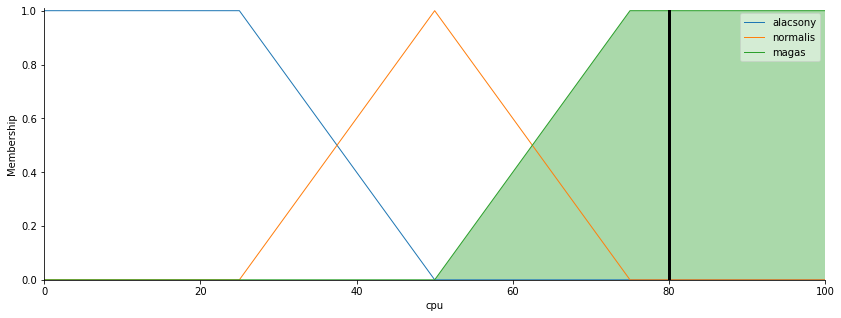

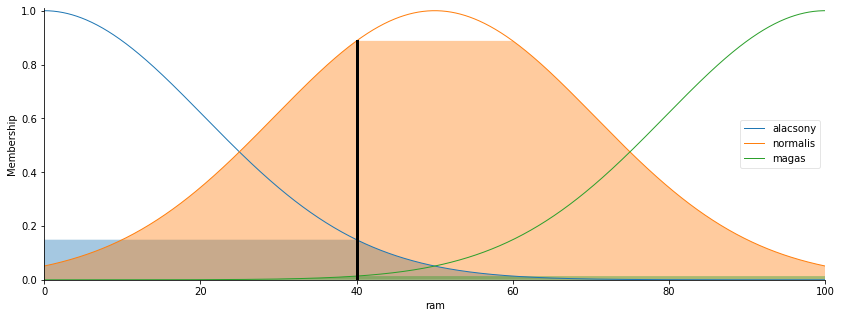

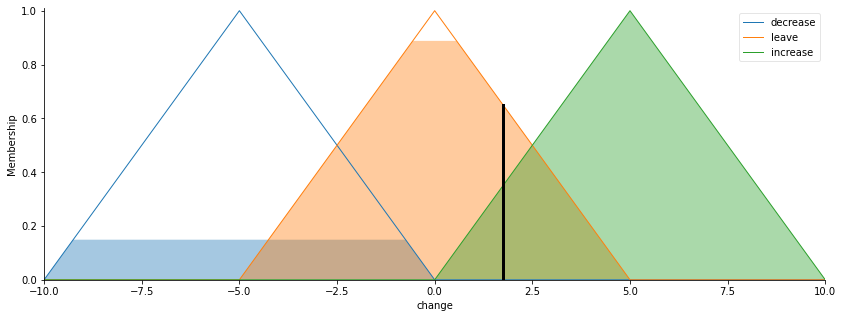

In [ ]:
cpu_ = 80
ram_ = 40

plt.rcParams["figure.figsize"] = (14,5)

CPU         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'cpu')

RAM         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'ram')

Change      = ctrl.Consequent(np.arange(-10, 10.1, 0.1), 'change')

CPU['alacsony']   = fuzzy.trapmf(CPU.universe, [0, 0, 25, 50])
CPU['normalis']   = fuzzy.trimf(CPU.universe, [25, 50, 75])
CPU['magas']  = fuzzy.trapmf(CPU.universe, [50, 75, 100, 100])

RAM['alacsony']   = fuzzy.gaussmf(RAM.universe, 0, 20.5)
RAM['normalis']   = fuzzy.gaussmf(RAM.universe, 50, 20.5)
RAM['magas']  = fuzzy.gaussmf(RAM.universe, 100, 20.5)

Change['decrease'] = fuzzy.trimf(Change.universe, [-10, -5, 0])
Change['leave']    = fuzzy.trimf(Change.universe, [-5, 0, 5])
Change['increase'] = fuzzy.trimf(Change.universe, [0, 5, 10])

# CPU.view()
# RAM.view()
# Change.view()

# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= CPU['alacsony'] | RAM['alacsony'], consequent = Change['decrease'])

rule2 = ctrl.Rule(antecedent= CPU['normalis'], consequent = Change['leave'])
rule3 = ctrl.Rule(antecedent= RAM['normalis'], consequent = Change['leave'])

rule4 = ctrl.Rule(antecedent= CPU['magas'] | RAM['magas'], consequent = Change['increase'])


# a szabályok
print(rule1); print(rule2); print(rule3)

# három szabályunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['cpu'] = cpu_
simulation.input['ram'] = ram_

simulation.compute()

print('----------------------------------------')
print('change  :', simulation.output['change'])
print('----------------------------------------')
print(simulation.input)

sim = simulation

CPU.view(sim = simulation)
RAM.view(sim = simulation)
Change.view(sim = simulation)


IF cpu[alacsony] OR ram[alacsony] THEN change[decrease]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF cpu[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF ram[normalis] THEN change[leave]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
change  : 2.3020136626415297
----------------------------------------
cpu : 60
ram : 40



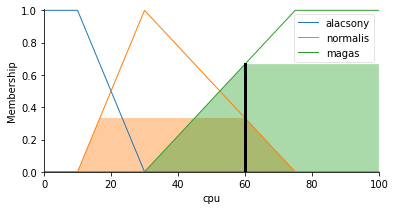

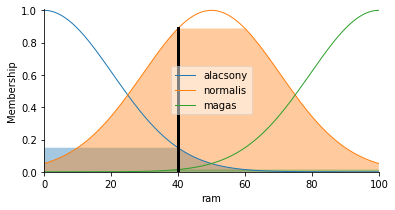

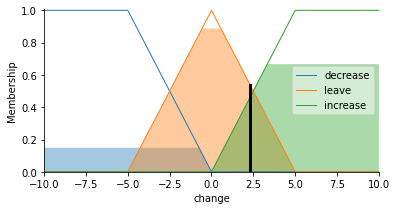

In [ ]:
cpu_ = 60
ram_ = 40

plt.rcParams["figure.figsize"] = (6,3)

CPU         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'cpu')

RAM         = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'ram')

Change      = ctrl.Consequent(np.arange(-10, 10.1, 0.1), 'change')

CPU['alacsony']   = fuzzy.trapmf(CPU.universe, [0, 0, 10, 30])
CPU['normalis']   = fuzzy.trimf(CPU.universe, [10, 30, 75])
CPU['magas']  = fuzzy.trapmf(CPU.universe, [30, 75, 100, 100])

RAM['alacsony']   = fuzzy.gaussmf(RAM.universe, 0, 20.5)
RAM['normalis']   = fuzzy.gaussmf(RAM.universe, 50, 20.5)
RAM['magas']  = fuzzy.gaussmf(RAM.universe, 100, 20.5)

Change['decrease'] = fuzzy.trapmf(Change.universe, [-10, -10, -5, 0])
Change['leave']    = fuzzy.trimf(Change.universe, [-5, 0, 5])
Change['increase'] = fuzzy.trapmf(Change.universe, [0, 5, 10, 10])

# CPU.view()
# RAM.view()
# Change.view()

# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= CPU['alacsony'] | RAM['alacsony'], consequent = Change['decrease'])

rule2 = ctrl.Rule(antecedent= CPU['normalis'], consequent = Change['leave'])
rule3 = ctrl.Rule(antecedent= RAM['normalis'], consequent = Change['leave'])

rule4 = ctrl.Rule(antecedent= CPU['magas'] | RAM['magas'], consequent = Change['increase'])


# a szabályok
print(rule1); print(rule2); print(rule3)

# három szabályunk van
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

simulation = ctrl.ControlSystemSimulation(system)

simulation.input['cpu'] = cpu_
simulation.input['ram'] = ram_

simulation.compute()

print('----------------------------------------')
print('change  :', simulation.output['change'])
print('----------------------------------------')
print(simulation.input)

sim = simulation

CPU.view(sim = simulation)
RAM.view(sim = simulation)
Change.view(sim = simulation)


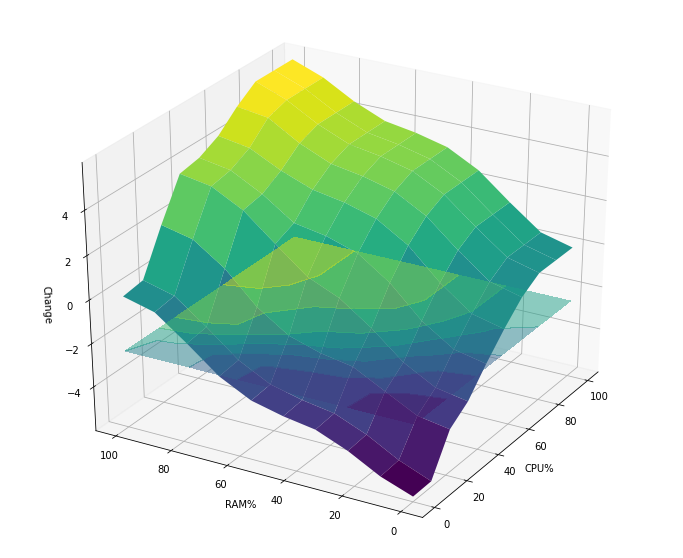

In [ ]:
# Ez kiértékelés nagyobb felbontással is elvégezhető te több számítással jár

step = 10

cpu_space = np.linspace(0, 100, step)
ram_space = np.linspace(0, 100, step)
x, y = np.meshgrid(cpu_space, ram_space)
z = np.zeros_like(x)

# Kiszámítjuk a rendszer kimeneteti értékét a két bemeneti változó függvényében
for i in range(step):
  for j in range(step):
    sim.input['cpu'] = x[i, j]
    sim.input['ram'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['change']

# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('CPU%')
ax.set_ylabel('RAM%')
ax.set_zlabel('Change')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)

<a name="pelda3"></a>

[vissza a tartalomhoz](#tartalom)

# Példa 3

In [ ]:
plt.rcParams["figure.figsize"] = (14,5)

In [ ]:
# Create universe

Étel         = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food')

Felszolgálás = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'service')

Borravaló    = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'tip')

In [ ]:
Borravaló.defuzzify_method = 'centroid'
Borravaló.universe.mean()

15.0

No handles with labels found to put in legend.


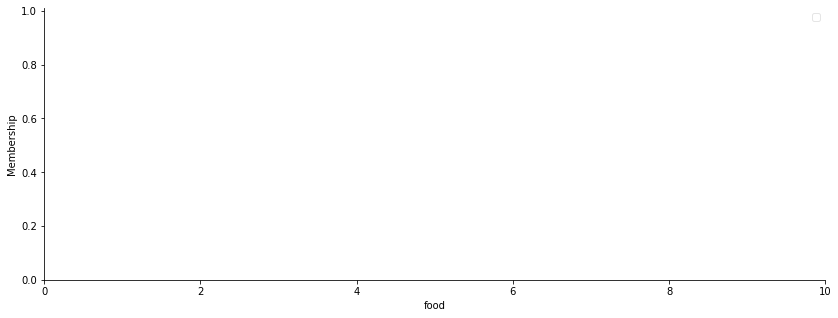

In [ ]:
Étel.view()

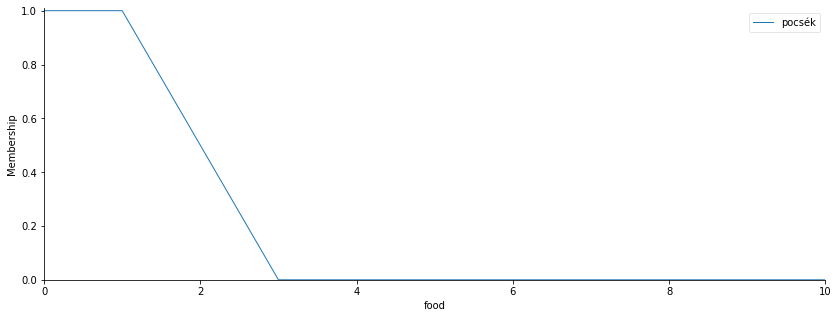

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

Étel['pocsék'] = fuzzy.trapmf(Étel.universe, [0, 0, 1, 3])

Étel.view()

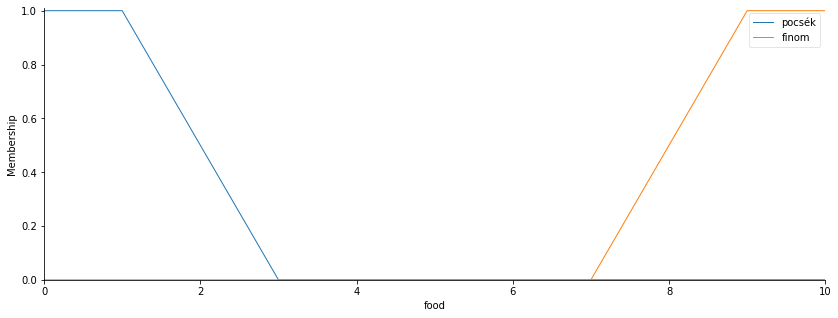

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{felhős})

Étel['finom'] = fuzzy.trapmf(Étel.universe, [7, 9, 10, 10])

Étel.view()

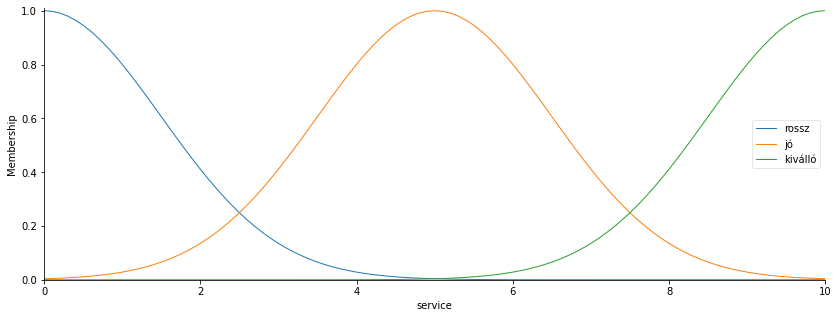

In [ ]:
# Eddig megvagyunk a Étel változó tagsági fűggvényeivel {pocsék, finom}

# Most készítsük el a Felszolgálás tagsági függvényeit is {rossz, jó, kiválló}

# Felszolgálás['rossz']   = fuzzy.zmf(Felszolgálás.universe, 0, 5)

Felszolgálás['rossz']   = fuzzy.gaussmf(Felszolgálás.universe, 0, 1.5)

Felszolgálás['jó']      = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)

# Felszolgálás['kiválló'] = fuzzy.smf(Felszolgálás.universe, 5, 10)

Felszolgálás['kiválló'] = fuzzy.gaussmf(Felszolgálás.universe, 10, 1.5)

Felszolgálás.view()

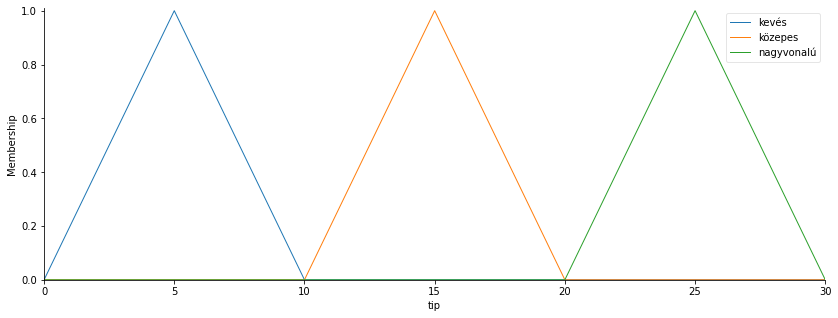

In [ ]:
# Most készítsük el a Borravaló változó tagsági függvyényeit is {kevés, közepes, nagyvonalú}

Borravaló['kevés']      = fuzzy.trimf(Borravaló.universe, [0, 5, 10])
Borravaló['közepes']    = fuzzy.trimf(Borravaló.universe, [10, 15, 20])
Borravaló['nagyvonalú'] = fuzzy.trimf(Borravaló.universe, [20, 25, 30])

Borravaló.view()

In [ ]:
# Most készítsük el a szabályokat

rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])


In [ ]:
def fuzzyDemo(Felszolgálás_ = 3, Étel_ = 8):

  # rule1 = setRules(Type)

  # a szabályok
  print(rule1)
  print(rule2)
  print(rule3)

  # két szabályunk van
  system = ctrl.ControlSystem([rule1, rule2, rule3])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['service'] = Felszolgálás_
  simulation.input['food'] = Étel_

  simulation.compute()

  print('----------------------------------------')
  print('borravaló  :', simulation.output['tip'])
  print('----------------------------------------')
  print(simulation.input)

  Felszolgálás.view(sim = simulation)
  Étel.view(sim = simulation)
  Borravaló.view(sim = simulation)

  return simulation


## Igy is vissza lehet kapni az adott bemenet tagsággi függvényhez tartozó értékét

In [ ]:
print(Felszolgálás.universe.shape)

# Felszolgálás['jó'] = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
mfx = fuzzy.gaussmf(Felszolgálás.universe, 5, 1.5)
print(mfx.shape)

# mik a tagsággi függvényhez tartozó értékek a következ pontokban (1, 2, 3.5, 5)
fuzzy.interp_membership(Felszolgálás.universe, mfx, [1.0, 2.0, 3.5, 5.0])

(101,)
(101,)


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [ ]:
print(Felszolgálás.__len__())
print(Felszolgálás.__getitem__('jó'))
a = Felszolgálás.__getitem__('jó')
print(type(a))
b = a.membership_value
print(type(b))
a.mf

# Elég bonyolultan de le lehet hívni Felszolgálás objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('jó').mf, [1, 2, 3.5, 5])

101
service[jó]
<class 'skfuzzy.control.term.Term'>
<class 'skfuzzy.control.state.StatePerSimulation'>


array([0.0285655 , 0.13533528, 0.60653066, 1.        ])

In [ ]:
# ide kéne egy olyan plotot raknom ami mutatja az adott függvényt, és mutatja az egyes x, hez tartozó értéket minkét (ha egynél több átviteli függvényhez is tartozik az y)

OrderedDict([('rossz', service[rossz]), ('jó', service[jó]), ('kiválló', service[kiválló])])
Felszolgálás['rossz'](3) : 	0.14
Felszolgálás['jó'](3) : 	0.41
Felszolgálás['kiválló'](3) : 	0.00


Text(31, 0.41111229050718745, '0.41')

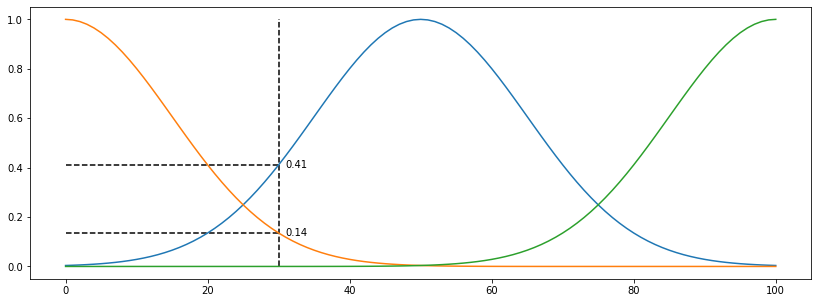

In [ ]:
plt.plot(Felszolgálás['jó'].mf)
plt.plot(Felszolgálás['rossz'].mf)
plt.plot(Felszolgálás['kiválló'].mf)

print(Felszolgálás.terms)

# Elég bonyolultan de le lehet hívni Felszolgálás objektumból a magát a tagsági függvényt (mf)
y_service_good    = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('jó').mf, [3])
y_service_bad     = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('rossz').mf, [3])
y_service_exelent = fuzzy.interp_membership(Felszolgálás.universe, Felszolgálás.__getitem__('kiválló').mf, [3])


print("Felszolgálás['rossz'](3) : \t{0:0.2f}".format(y_service_bad[0]))
print("Felszolgálás['jó'](3) : \t{0:0.2f}".format(y_service_good[0]))
print("Felszolgálás['kiválló'](3) : \t{0:0.2f}".format(y_service_exelent[0]))

plt.vlines(30, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')

plt.hlines(y_service_bad, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')
plt.hlines(y_service_good, xmin = 0, xmax = 30, colors = 'k', linestyles = 'dashed')

plt.text(31, y_service_bad[0], '{:0.2f}'.format(y_service_bad[0]), verticalalignment = 'center')
plt.text(31, y_service_good[0], '{:0.2f}'.format(y_service_good[0]), verticalalignment ='center')



In [ ]:
Étel.terms

OrderedDict([('pocsék', food[pocsék]), ('finom', food[finom])])

In [ ]:
# Elég bonyolultan de le lehet hívni Étel objektumból a magát a tagsági függvényt (mf)
fuzzy.interp_membership(Étel.universe, Étel.__getitem__('finom').mf, [8])

array([0.5])

In [ ]:
for key in Étel.terms.keys():
  print(key)

pocsék
finom


Étel['pocsék'](3) : 	0.00
Étel['finom'](3) : 	0.50


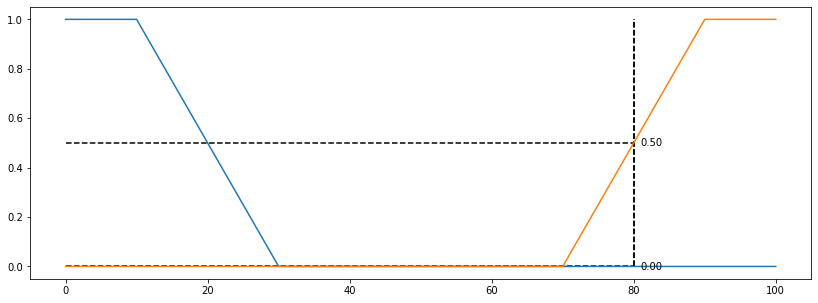

In [ ]:
for key in Étel.terms.keys():
  plt.plot(Étel[key].mf)

  value = fuzzy.interp_membership(Étel.universe, Étel.__getitem__(key).mf, [8])

  print("Étel['{0}'](3) : \t{1:0.2f}".format(key, value[0]))

  plt.vlines(80, ymin = 0, ymax = 1, colors = 'k', linestyles = 'dashed')
  plt.hlines(value, xmin = 0, xmax = 80, colors = 'k', linestyles = 'dashed')
  plt.text(81, value[0], '{:0.2f}'.format(value[0]), verticalalignment = 'center')




## A bemeneti változók és a hozzá tartozó értékeke a következőek



In [ ]:
# Tehát a bemeneti változók és a hozzá tartozó értékeke a következőek

# Felszolgálás = 3 -> Felszolgálás['rossz'](0.14) és Felszolgálás['jó'](0.41)

# Étel = 8 -> Étel['pocsék](0.00) és Étel['finom'](0.5)

## Az aggregációs szabályok


In [ ]:
# Tekintsük most át a szabályokat

# rule1 = ctrl.Rule(antecedent= Felszolgálás['rossz'] | Étel['pocsék'], consequent = Borravaló['kevés'])

# Felszolgálás['rossz'](0.14) OR Étel['pocsék'](0.00) -> Borravaló['kevés'] -> max(0.14, 0.00) = 0.14


# rule2 = ctrl.Rule(antecedent= Felszolgálás['jó'], consequent = Borravaló['közepes'])

# Felszolgálás['jó'](0.41) -> Borravaló['közepes'] = 0.41


# rule3 = ctrl.Rule(antecedent= Felszolgálás['kiválló'] | Étel['finom'], consequent = Borravaló['nagyvonalú'])

# Felszolgálás['kiválló'](0.00) OR Étel['finom'](0.5) -> Borravaló['nagyvonalú'] -> max(0.00, 0.50) = 0.50

## Aggregáció

In [ ]:

# Tehát a három szabály alapján a kimeneti változó (Borravaló) mindhárom {kevés, közepes, nagyvonalú} tagsági függvény aktív lesz

# A fenti számítások alapján a következő képen

# rule1 -> Borravaló['kevés'] = 0.14
# rule2 -> Borravaló['közepes'] = 0.41
# rule3 -> Borravoló['nagyvonalú'] = 0.5


<a name="defuzzifikacio"></a>

## Defuzzifikáció<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Tartalom</font></a>

###(Mamdani-style)

A leggyakrabban használt de-fuzzyfikációs eljárás a középérték, vagy centroid módszer (center of gravity). Azt a pontot keresi meg, amely az aggregált területet két egyenlő részre bontja, a következő módon:

$$ COG = \frac{\int_{a}^{b} \mu_A(x)x\ dx}{\int_{a}^{b} \mu_A(x)\ dx}$$

<br>


In [ ]:

# Borravaló = w1 * COG(Borravaló['kevés']) + w2 * COG(Borravaló['közepes']) + w3 * COG(Borravaló['nagyvonalú']) / (w1 + w2 + w3)

# Borravaló = ( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

# Borravaló = 18.42

( 0.14 * 5 + 0.41 * 15 + 0.5 * 25 ) / ( 0.14 + 0.41 + 0.5 )

18.42857142857143

## Interaktív Demo

In [ ]:
f = interact(fuzzyDemo, Felszolgálás_ = (0, 10), Étel_ = (0, 10));

interactive(children=(IntSlider(value=3, description='Felszolgálás_', max=10), IntSlider(value=8, description=…

In [ ]:
sim = f.widget.result

In [ ]:
type(sim)

skfuzzy.control.controlsystem.ControlSystemSimulation

In [ ]:
# a sim objektumból a végeredményt így lehetem visszakapni

# legfőképpen azt, hogy a Borravaló objektum egyes tagsági függvényein milyen értékek vannak
# és azt, hogy a hozzá tartozó érték alapján a különböző függvény alatti terület számítáási módszerekkel
# (itt most csak COG) milyen de-fuzzyfikációs értéket kap

In [ ]:
sim.output

OrderedDict([('tip', 18.00589051927782)])

## A teljes kimeneti tér ábrázolása a két bemeneti változó függvényében

In [ ]:

# Ez kiértékelés nagyobb felbontással is elvégezhető te több számítással jár

felszolgalas_space = np.linspace(0, 10, 10)
etel_space = np.linspace(0, 10, 10)
x, y = np.meshgrid(felszolgalas_space, etel_space)
z = np.zeros_like(x)


# Kiszámítjuk a rendszer kimeneteti értékét a két bemeneti változó függvényében
for i in range(10):
  for j in range(10):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

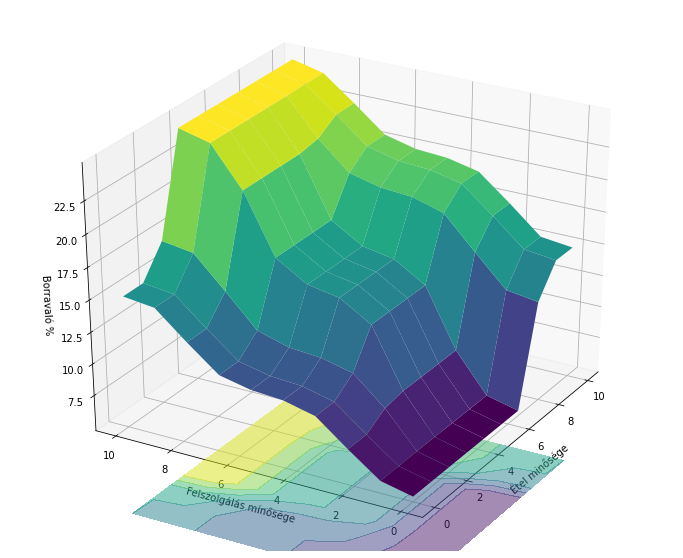

In [ ]:
# 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Étel minősége')
ax.set_ylabel('Felszolgálás mínősége')
ax.set_zlabel('Borravaló %')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x, y, z, zdir = 'z', offset = -2.5, cmap = 'viridis', alpha = 0.5)

ax.view_init(30, 210)

## Surface Graphic

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# A kiértékelés nagyobb felbontással is elvégezhető de több számítással jár

service = np.linspace(0, 10, 20)
food    = np.linspace(0, 10, 20)

x, y = np.meshgrid(service, food)

z = np.zeros_like(x)

z.shape

(20, 20)

In [ ]:
# Az előzőnél nagyobb felbontásban, ugyan az kisérlet.

# A két bemeneti változót 20 egyenlő lépésben vizsgálva az összes lehetséges
# kombinációra kiszámolt értékek. Majd ezeket fogom ábrázolni egy 3 dimenziós
# interaktív program segítségével

for i in range(len(service)):
  for j in range(len(food)):
    sim.input['service'] = x[i, j]
    sim.input['food'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

# Ez az ábrázolási mód bár látványos, kettőnél több bemeneti változónál
# többet nem tudunk ábrázolni, így használhatósága erősen korlátozott.
# Az alábbi példát inkább didaktikai célból hoztam létre

In [ ]:
%%capture
!pip install plotly
!pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
surface = go.Surface(x = x, y = y, z = z)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = 'A kimeneti változó értéke a két bemeneti változó függvényében', autosize=False,
                  width = 700, height = 500,
                  scene = dict(
                    xaxis_title = 'food',
                    yaxis_title = 'service',
                    zaxis_title = 'tip %'),
                  margin = dict(l = 65, r = 50, b = 65, t = 60))

fig.show()

<a name="todo"></a>

[vissza a tartalomhoz](#tartalom)

## ToDo

1. Tanuló adatokon - X, y - értékpárokon végzett tanítás és szabályok kialakítása. Illetve a tanult adatokon visszaellenőrizni a rendszer pontosságát. A tankönyvben ezt a vizrendszer foszfortalmát mérő példában látható.

2. A logikai alapműveletek Fuzzy halmazokkal részt ábrázolni is a könyebb megértés céljából. Az ötletet a következő ábra adta.

<img src="https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/kepek/8820/Slide16.GIF"> 


3. A fuzzy részhalmaz fogalmát is ábrázolni tudom, hogy szemléletesebb legyen. Ezek az ábrák nekem is segítették a megértést.


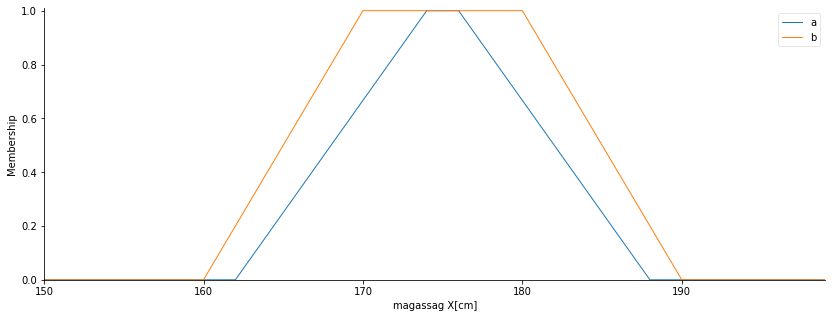

In [ ]:
#@title
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

x                = np.arange(150, 200, 1)

v         = ctrl.Antecedent(np.arange(150, 200, 1), 'magassag X[cm]')

v['a'] = fuzzy.trapmf(v.universe, [162, 174, 176, 188])
v['b'] = fuzzy.trapmf(v.universe, [160, 170, 180, 190])


v.view()

4. Fuzzy rendszerek mérnöki megközelítésben - 4. gyakorlat című részben van egy **simulink** nevű modul, amely a tagsági függvények paramétereinek optimalizálását végzi.<br><br>Ehhez hasonló megoldást szertnék én is készíteni Pythonban.

5. **Összetettebb rendszerek készítése**, ahol egy Fuzzy rendszer kimenete egy következő Fuzzy rendszer bemenete lehet. Ezáltal egyes csoportokra külön Fuzzy rendszereket építhetek, amelyekből összeállítok egy mindenre érvényes Fuzzy rendszert. A tankönyvben ez az 5.gyakorlat című részben a külföldre utazás példáján keresztül kerütl bemutatásra.

6. A **kettes típusú fuzzy halmazok** megismerése és ábrázolása. Fuzzy-neurális hálózatok megismerése és ábrázolása.

7. A **scilab** program megismerése, illetve az ott taláható példákon át a téma alaposabb megísmerése és a felhasználási lehetőségek áttekintése. https://www.scilab.org/tutorials



<a name="takagi_sugeno_rendszer"></a>

[vissza a tartalomhoz](#tartalom)

# Takagi-Sugeno rendszer <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

Erről a témáról szerettem volna bővebben is írni és leprogramozni, de sajnos nem jutott rá idő. Pedig érdemes lenne foglalkozni vele.

Röviden saját szavakkal, a kiértékelési függvény nem fuzzy hallmaz hanem valamilyen, vagy bármilyen függvény lehet.
1. Gyakorlatilag elkerüljük a De-fuzzifikációt
2. Nagyon érdekes, constans, lineáris, vagy nem lineáris fügvényeket is készíthetünk.
3. Pythonban nagyon könnyű implementálni

-23.23809523809524


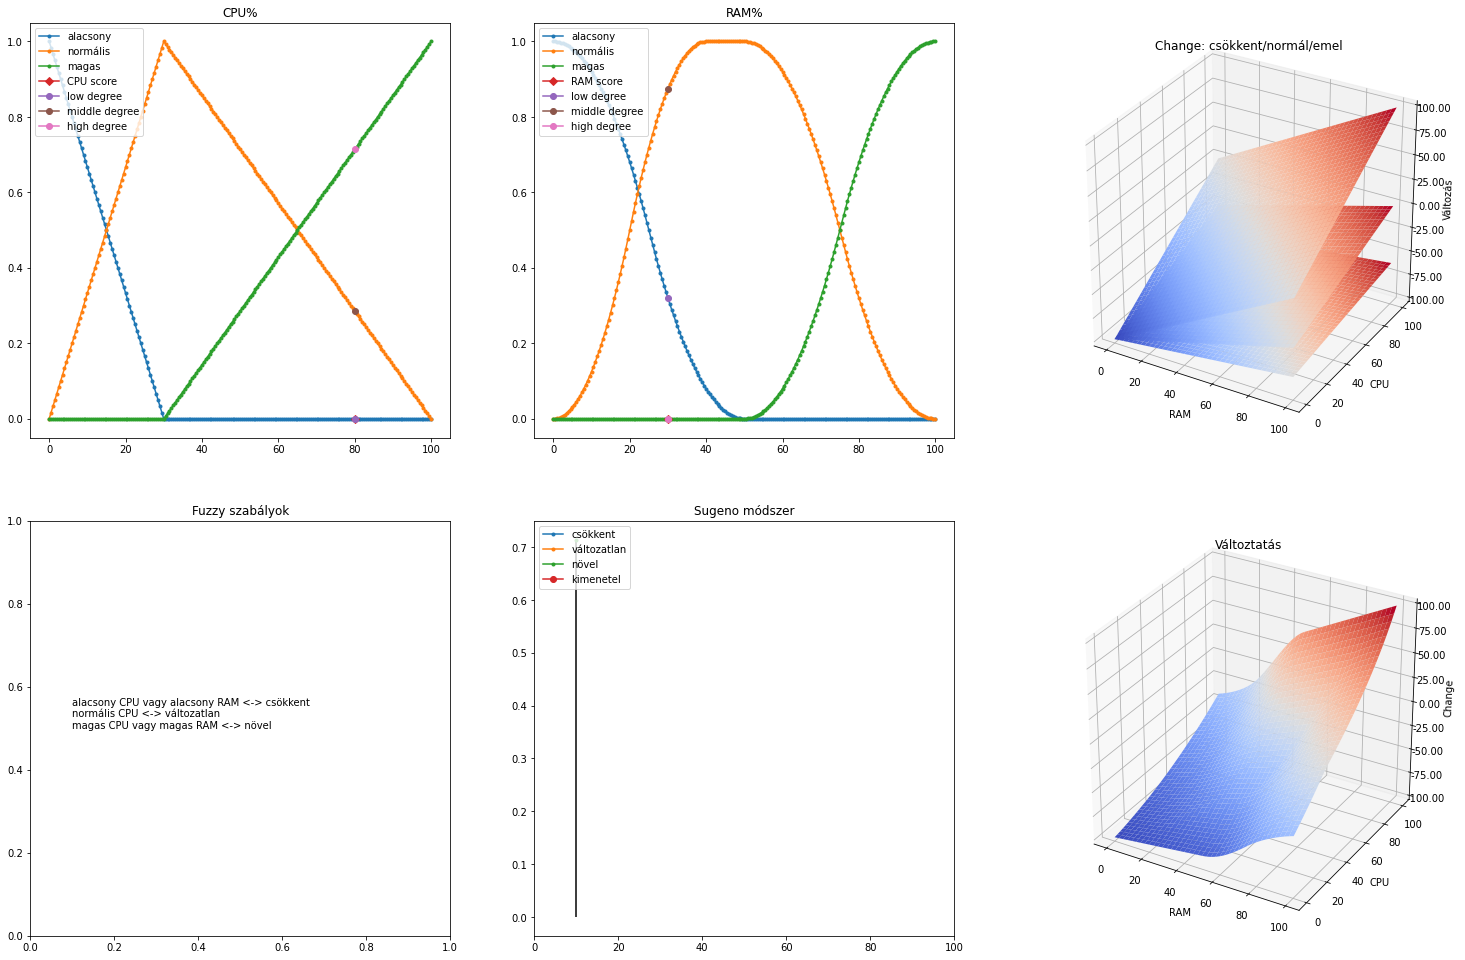

In [ ]:
#@title
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

# for flake8 check
Axes3D

# Problem: from service quality and food quality to tip amount
x_service = np.arange(0, 100.01, 0.5)
x_food = np.arange(0, 100.01, 0.5)
x_tip = np.arange(-10, 10.01, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 30])
service_middle = fuzz.trimf(x_service, [0, 30, 100])
service_high = fuzz.trimf(x_service, [30, 100, 100])

food_low = fuzz.zmf(x_food, 0, 50)
food_middle = fuzz.pimf(x_food, 0, 40, 50, 100)
food_high = fuzz.smf(x_food, 50, 100)

# =======================================
# Sugeno Method: z = f(x, y)
# Tip equation: z = ax + by + c
"""
# should use 3D data
tip_low = -5.0 + x_service * 0.2 + x_food * 0.2
tip_middle = -5.0 + x_service * 0.5 + x_food * 0.5
tip_high = -5.0 + x_service * 1.0 + x_food * 1.0
x_tip = x_food
"""
f, s = np.meshgrid(x_food, x_service, indexing="ij")
alpha1 = -100.0
tip_low_grid = alpha1 + s * 0.2 + f * 0.2
tip_middle_grid = alpha1 + s * 0.5 + f * 0.5
tip_high_grid = alpha1 + s + f

# Input: service score and food score
service_score = 80
food_score = 30

service_low_degree = fuzz.interp_membership(
    x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(
    x_service, service_middle, service_score)
service_high_degree = fuzz.interp_membership(
    x_service, service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

# Whole config
fig_scale_x = 4.0
fig_scale_y = 3.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("CPU%")
plt.plot(x_service, service_low, label="alacsony", marker=".")
plt.plot(x_service, service_middle, label="normális", marker=".")
plt.plot(x_service, service_high, label="magas", marker=".")
plt.plot(service_score, 0.0, label="CPU score", marker="D")
plt.plot(service_score, service_low_degree, label="low degree", marker="o")
plt.plot(service_score, service_middle_degree, label="middle degree", marker="o")
plt.plot(service_score, service_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("RAM%")
plt.plot(x_food, food_low, label="alacsony", marker=".")
plt.plot(x_food, food_middle, label="normális", marker=".")
plt.plot(x_food, food_high, label="magas", marker=".")
plt.plot(food_score, 0.0, label="RAM score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

# =======================================
# z = f(x, y)
"""
# should use 3D display
plt.subplot(row, col, 3)
plt.title("Tip")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")
"""
ax3 = fig.add_subplot(row, col, 3, projection="3d")
plt.title("Change: csökkent/normál/emel")

ax3.set_xlabel("RAM")
ax3.set_ylabel("CPU")
ax3.set_zlabel("Változás")
ax3.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf1 = ax3.plot_surface(f, s, tip_low_grid, cmap=cm.coolwarm, linewidth=0)
surf2 = ax3.plot_surface(f, s, tip_middle_grid, cmap=cm.coolwarm, linewidth=0)
surf3 = ax3.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high

# =======================================
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

plt.subplot(row, col, 4)
plt.title("Fuzzy szabályok")
t = ("alacsony CPU vagy alacsony RAM <-> csökkent\n"
     "normális CPU <-> változatlan\n"
     "magas CPU vagy magas RAM <-> növel")
plt.text(0.1, 0.5, t)

plt.subplot(row, col, 5)
plt.title("Sugeno módszer")

# Apply the equaltion:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = alpha1 + 0.2 * food_score + 0.2 * service_score
z2 = alpha1 + 0.5 * food_score + 0.5 * service_score
z3 = alpha1 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot(z1, w1, label="csökkent", marker=".")
plt.xlim(0, 100)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="változatlan", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="növel", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="kimenetel", marker="o")
plt.legend(loc="upper left")

# =======================================
ax6 = fig.add_subplot(row, col, 6, projection="3d")
plt.title("Változtatás")

for i in range(0, len(f)):
    for j in range(0, len(s)):
        x = f[i, j]
        y = s[i, j]
        f_low_degree = fuzz.interp_membership(x_food, food_low, x)
        f_middle_degree = fuzz.interp_membership(x_food, food_middle, x)
        f_high_degree = fuzz.interp_membership(x_food, food_high, x)

        s_low_degree = fuzz.interp_membership(x_service, service_low, y)
        s_middle_degree = fuzz.interp_membership(x_service, service_middle, y)
        s_high_degree = fuzz.interp_membership(x_service, service_high, y)

        w1 = np.fmax(s_low_degree, f_low_degree)
        w2 = s_middle_degree
        w3 = np.fmax(s_high_degree, f_high_degree)

        tip_high_grid[i, j] = (w1 * tip_low_grid[i, j]
                               + w2 * tip_middle_grid[i, j]
                               + w3 * tip_high_grid[i, j]) / (w1 + w2 + w3)

ax6.set_xlabel("RAM")
ax6.set_ylabel("CPU")
ax6.set_zlabel("Change")
ax6.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf6 = ax6.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

plt.show()

## Nem fuzzy megközelítés

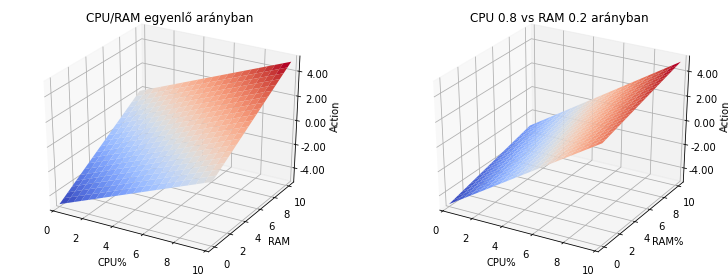

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

# Axes3D


# ---------------------------------------------------------------------------
# Var set
cpu = np.arange(0, 10.01, 0.5)
ram = np.arange(0, 10.01, 0.5)
f, s = np.meshgrid(cpu, ram, indexing="ij")

# ---------------------------------------------------------------------------
# Plot configuration
row = 1
col = 2

fig = plt.figure(figsize=(6.4 * 2, 2.4 * 2))



# ---------------------------------------------------------------------------
# Plot 1
ax = fig.add_subplot(row, col, 1, projection="3d")
plt.title("CPU/RAM egyenlő arányban")

action = (0.5) * (s + f) - 5

ax.set_xlabel("CPU%")
ax.set_xlim(0, 10)
ax.set_ylabel("RAM")
ax.set_xlim(0, 10)
ax.set_zlabel("Action")
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf = ax.plot_surface(s, f, action, cmap=cm.coolwarm, linewidth=0)



# ---------------------------------------------------------------------------
# Plot 2
ax2 = fig.add_subplot(row, col, 2, projection="3d")
plt.title("CPU 0.8 vs RAM 0.2 arányban")

cpu_ratio = 0.8
action = (cpu_ratio * (0.2 * s + 5) + (1 - cpu_ratio) * (0.2 * f - 5)) *5 - 20

ax2.set_xlabel("CPU%")
ax2.set_xlim(0, 10)
ax2.set_ylabel("RAM%")
ax2.set_xlim(0, 10)
ax2.set_zlabel("Action")
ax2.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf2 = ax2.plot_surface(s, f, action, cmap=cm.coolwarm, linewidth=0)


plt.show()

## Mamdami megoldás

In [ ]:
%%capture
!pip install scikit-fuzzy

action centroid deffuzzification = 4.67
action bisector defuzz		 = 6.25
action mean of maximum		 = 9.50
action minimum of maximum	 = 9.00
action maximum of maximum	 = 10.00


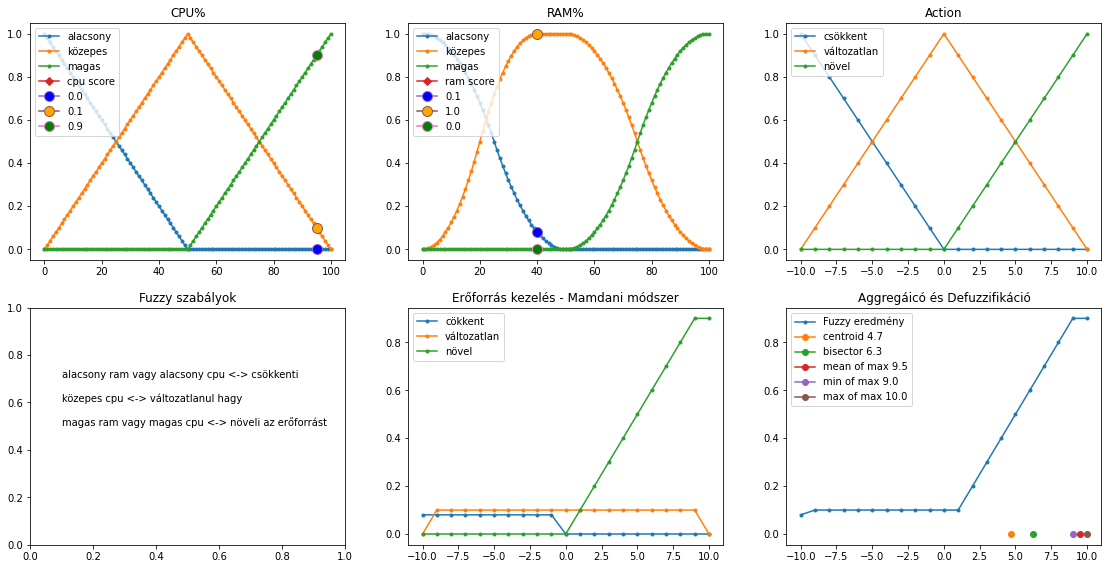

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from matplotlib import pyplot as plt

# A CPU és a RAM kihasználtság függvényében a hozzáadandó eszközök száma
x_cpu    = np.arange(0, 100.01, 1.0)
x_ram    = np.arange(0, 100.01, 1.0)
x_action = np.arange(-10, 10.01, 1.0)

# Tagsági függvények
cpu_low    = fuzzy.trimf(x_cpu, [0, 0, 50])
cpu_middle = fuzzy.trimf(x_cpu, [0, 50, 100])
cpu_high   = fuzzy.trimf(x_cpu, [50, 100, 100])

ram_low    = fuzzy.zmf(x_ram, 0, 50)
ram_middle = fuzzy.pimf(x_ram, 0, 40, 50, 100)
ram_high   = fuzzy.smf(x_ram, 50, 100)

action_decrease = fuzzy.trimf(x_action, [-10, -10, 0])
action_leave    = fuzzy.trimf(x_action, [-10, 0, 10])
action_increase = fuzzy.trimf(x_action, [0, 10, 10])

# Bemenetek, CPU 95, RAM 40
cpu_score = 95
ram_score = 40

cpu_low_degree = fuzzy.interp_membership(
    x_cpu, cpu_low, cpu_score)
cpu_middle_degree = fuzzy.interp_membership(
    x_cpu, cpu_middle, cpu_score)
cpu_high_degree = fuzzy.interp_membership(
    x_cpu, cpu_high, cpu_score)

ram_low_degree    = fuzzy.interp_membership(x_ram, ram_low, ram_score)
ram_middle_degree = fuzzy.interp_membership(x_ram, ram_middle, ram_score)
ram_high_degree   = fuzzy.interp_membership(x_ram, ram_high, ram_score)

# ---------------------------------------------------------------------
# Plot configuration
fig_scale_x = 3.0
fig_scale_y = 2.0
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3
markersize = 10
markerfacecolor = 'black'

plt.subplot(row, col, 1)
plt.title("CPU%")
plt.plot(x_cpu, cpu_low, label="alacsony", marker=".")
plt.plot(x_cpu, cpu_middle, label="közepes", marker=".")
plt.plot(x_cpu, cpu_high, label="magas", marker=".")
plt.plot(cpu_score, 0.0, label="cpu score", marker="D")
plt.plot(cpu_score, cpu_low_degree,
         label="{:.1f}".format(cpu_low_degree),
         marker="o", markersize=markersize, markerfacecolor='blue')
plt.plot(cpu_score, cpu_middle_degree,
         label="{:.1f}".format(cpu_middle_degree),
         marker="o", markersize=markersize, markerfacecolor='orange')
plt.plot(cpu_score, cpu_high_degree,
         label="{:.1f}".format(cpu_high_degree),
         marker="o", markersize=markersize, markerfacecolor='green')
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("RAM%")
plt.plot(x_ram, ram_low, label="alacsony", marker=".")
plt.plot(x_ram, ram_middle, label="közepes", marker=".")
plt.plot(x_ram, ram_high, label="magas", marker=".")
plt.plot(ram_score, 0.0, label="ram score", marker="D")
plt.plot(ram_score, ram_low_degree,
         label="{:.1f}".format(ram_low_degree),
         marker="o", markersize=markersize, markerfacecolor='blue')
plt.plot(ram_score, ram_middle_degree,
         label="{:.1f}".format(ram_middle_degree),
         marker="o", markersize=markersize, markerfacecolor='orange')
plt.plot(ram_score, ram_high_degree,
         label="{:.1f}".format(ram_high_degree),
         marker="o", markersize=markersize, markerfacecolor='green')
plt.legend(loc="upper left")

plt.subplot(row, col, 3)
plt.title("Action")
plt.plot(x_action, action_decrease, label="csökkent", marker=".")
plt.plot(x_action, action_leave, label="változatlan", marker=".")
plt.plot(x_action, action_increase, label="növel", marker=".")
plt.legend(loc="upper left")

# =======================================
# Mamdani (max-min) módszer:
# hozzárendelések
# * min mert a logika 'and' kapcsolat.
# 1) low_degree <-> action_decrease
# 2) middle_degree <-> action_leave
# 3) high_degree <-> action_increase

# =======================================
# alacsony ram OR alacsony cpu
low_degree = np.fmax(cpu_low_degree, ram_low_degree)
# közepes cpu
middle_degree = cpu_middle_degree
# magas ram OR magas cpu
high_degree = np.fmax(cpu_high_degree, ram_high_degree)

plt.subplot(row, col, 4)
plt.title("Fuzzy szabályok")
t = ("alacsony ram vagy alacsony cpu <-> csökkenti\n\n"
     "közepes cpu <-> változatlanul hagy\n\n"
     "magas ram vagy magas cpu <-> növeli az erőforrást")
plt.text(0.1, 0.5, t)

activation_low = np.fmin(low_degree, action_decrease)
activation_middle = np.fmin(middle_degree, action_leave)
activation_high = np.fmin(high_degree, action_increase)

plt.subplot(row, col, 5)
plt.title("Erőforrás kezelés - Mamdani módszer")

plt.plot(x_action, activation_low, label="cökkent", marker=".")
plt.plot(x_action, activation_middle, label="változatlan", marker=".")
plt.plot(x_action, activation_high, label="növel", marker=".")
plt.legend(loc="upper left")

# Aggregációs szabályok:
# * max az aggregációhoz, mivel a kapcsolat 'vagy' (nem 'és')
# A három tagsági függvény értéke közül a maximumot fogja figyelembe venni
aggregated = np.fmax(
    activation_low,
    np.fmax(activation_middle, activation_high))

# Defuzzifikáció
# Többféle defuzzifikációs módszert is deffiniálok
action_centroid = fuzzy.defuzz(x_action, aggregated, 'centroid')
action_bisector = fuzzy.defuzz(x_action, aggregated, 'bisector')
action_mom = fuzzy.defuzz(x_action, aggregated, "mom")
action_som = fuzzy.defuzz(x_action, aggregated, "som")
action_lom = fuzzy.defuzz(x_action, aggregated, "lom")

print('action centroid deffuzzification = {:.2f}'.format(action_centroid))
print('action bisector defuzz\t\t = {:.2f}'.format(action_bisector))
print('action mean of maximum\t\t = {:.2f}'.format(action_mom))
print('action minimum of maximum\t = {:.2f}'.format(action_som))
print('action maximum of maximum\t = {:.2f}'.format(action_lom))

plt.subplot(row, col, 6)
plt.title("Aggregáicó és Defuzzifikáció")
plt.plot(x_action, aggregated, label="Fuzzy eredmény", marker=".")
plt.plot(action_centroid, 0.0, marker="o",
         label="centroid {:.1f}".format(action_centroid))
plt.plot(action_bisector, 0.0, marker="o",
         label="bisector {:.1f}".format(action_bisector))
plt.plot(action_mom, 0.0, marker="o",
         label="mean of max {:.1f}".format(action_mom))
plt.plot(action_som, 0.0, marker="o",
         label="min of max {:.1f}".format(action_som))
plt.plot(action_lom, 0.0, marker="o",
         label="max of max {:.1f}".format(action_lom))
plt.legend(loc="upper left")

plt.show()

## Type II Tagsági függvények - Kisérleti fázis, nem foglalkoztam komolyabban vele

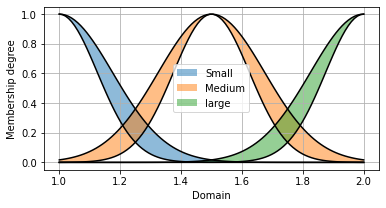

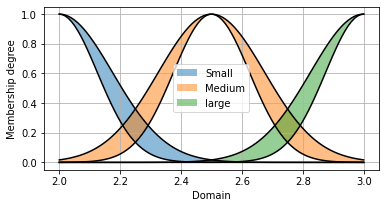

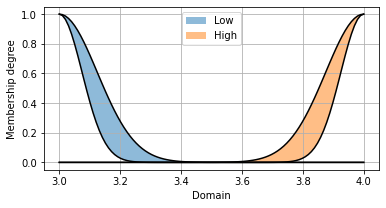

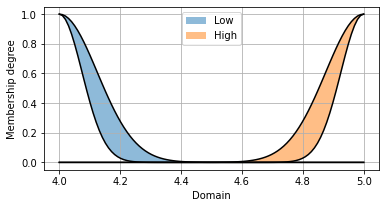

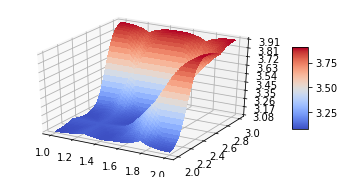

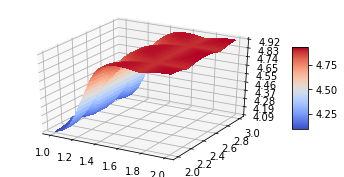

In [ ]:
from pyit2fls import Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, crisp
from numpy import linspace, meshgrid, zeros
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Defining the domain of the input variable x1.
domain1 = linspace(1., 2., 100)

# Defining the domain of the input variable x2.
domain2 = linspace(2., 3., 100)

# Defining the domain of the output variable y1.
domain3 = linspace(3., 4., 100)

# Defining the domain of the output variable y2.
domain4 = linspace(4., 5., 100)

# Defining the Small set for the input variable x1.
Small1 = IT2FS_Gaussian_UncertStd(domain1, [1., 0.15, 0.05, 1.])

# Defining the Small set for the input variable x2.
Small2 = IT2FS_Gaussian_UncertStd(domain2, [2., 0.15, 0.05, 1.])

# Defining the Medium set for the input variable x1.
Medium1 = IT2FS_Gaussian_UncertStd(domain1, [1.5, 0.15, 0.05, 1.])

# Defining the Medium set for the input variable x2.
Medium2 = IT2FS_Gaussian_UncertStd(domain2, [2.5, 0.15, 0.05, 1.])

# Defining the Large set for the input variable x1.
Large1 = IT2FS_Gaussian_UncertStd(domain1, [2., 0.15, 0.05, 1.])

# Defining the Large set for the input variable x1.
Large2 = IT2FS_Gaussian_UncertStd(domain2, [3., 0.15, 0.05, 1.])

# Plotting the sets defined for the input variable x1.
IT2FS_plot(Small1, Medium1, Large1, 
            legends=["Small", "Medium", "large"])

# Plotting the sets defined for the input variable x1.
IT2FS_plot(Small2, Medium2, Large2,
            legends=["Small", "Medium", "large"])

# Defining the Low set for the output variable y1
Low1 = IT2FS_Gaussian_UncertStd(domain3, [3., 0.1, 0.05, 1.])

# Defining the Low set for the output variable y2
Low2 = IT2FS_Gaussian_UncertStd(domain4, [4., 0.1, 0.05, 1.])

# Defining the High set for the output variable y1
High1 = IT2FS_Gaussian_UncertStd(domain3, [4., 0.1, 0.05, 1.])

# Defining the High set for the output variable y2
High2 = IT2FS_Gaussian_UncertStd(domain4, [5., 0.1, 0.05, 1.])

# Plotting the sets defined for the output variable y1.
IT2FS_plot(Low1, High1, 
            legends=["Low", "High"])

# Plotting the sets defined for the output variable y2.
IT2FS_plot(Low2, High2, 
            legends=["Low", "High"])

# Defining the mamdani interval type 2 fuzzy logic system
myIT2FLS = Mamdani(min_t_norm, max_s_norm)

# Adding the input variables to the myIT2FLS
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")

# Adding the output variables to the myIT2FLS
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

# Defining the rule base of the MyIT2FLS
myIT2FLS.add_rule([("x1", Small1), ("x2", Small2)], [("y1", Low1), ("y2", Low2)])
myIT2FLS.add_rule([("x1", Small1), ("x2", Medium2)], [("y1", Low1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Small1), ("x2", Large2)], [("y1", Low1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Medium1), ("x2", Small2)], [("y1", Low1), ("y2", Low2)])
myIT2FLS.add_rule([("x1", Medium1), ("x2", Medium2)], [("y1", Low1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Medium1), ("x2", Large2)], [("y1", High1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Large1), ("x2", Small2)], [("y1", High1), ("y2", Low2)])
myIT2FLS.add_rule([("x1", Large1), ("x2", Medium2)], [("y1", High1), ("y2", High2)])
myIT2FLS.add_rule([("x1", Large1), ("x2", Large2)], [("y1", High1), ("y2", High2)])

# Evaluating the outputs of the myIT2FLS for the points in the input domain, 
# and plotting the output surfaces.
X1, X2 = meshgrid(domain1, domain2)
Z1 = zeros(shape=(len(domain1), len(domain2)))
Z2 = zeros(shape=(len(domain1), len(domain2)))
for i, x1 in zip(range(len(domain1)), domain1):
    for j, x2 in zip(range(len(domain2)), domain2):
        it2out, tr = myIT2FLS.evaluate({"x1":x1, "x2":x2})
        Z1[i, j], Z2[i, j] = crisp(tr["y1"]), crisp(tr["y2"])

fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X1, X2, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X1, X2, Z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()





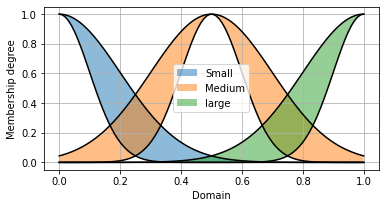

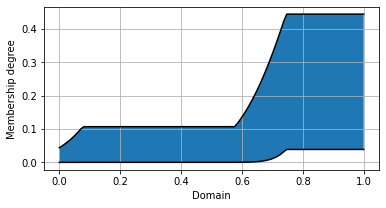

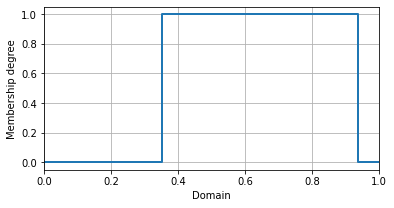

0.6434985240365899


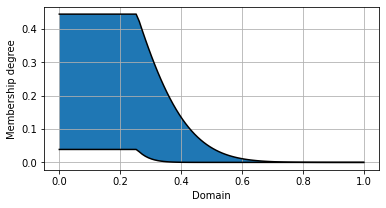

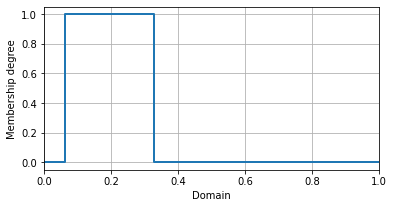

0.19561905995749373


In [ ]:
from pyit2fls import IT2FLS, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, TR_plot, crisp
from numpy import linspace

domain = linspace(0., 1., 100)  # Domain is defined as discrete space in the
                                # interval [0, 1] divided to 100 parts.

# The Small set is defined as a Guassian IT2FS with uncertain standard deviation 
# value. The mean, the standard deviation center, the standard deviation spread, 
# and the height of the set are set to 0., 0.15, 0.1, and 1., respectively.
Small = IT2FS_Gaussian_UncertStd(domain, [0, 0.15, 0.1, 1.])

# The Medium set is defined as a Guassian IT2FS with uncertain standard deviation 
# value. The mean, the standard deviation center, the standard deviation spread, 
# and the height of the set are set to 0.5, 0.15, 0.1, and 1., respectively.
Medium = IT2FS_Gaussian_UncertStd(domain, [0.5, 0.15, 0.1, 1.])

# The Large set is defined as a Guassian IT2FS with uncertain standard deviation 
# value. The mean, the standard deviation center, the standard deviation spread, 
# and the height of the set are set to 1., 0.15, 0.1, and 1., respectively.
Large = IT2FS_Gaussian_UncertStd(domain, [1., 0.15, 0.1, 1.])

# Three sets, Small, Medium, and Large are plotted using the function IT2FS_plot.
IT2FS_plot(Small, Medium, Large, legends=["Small", "Medium", "large"], filename="simp_ex_sets")

# An Interval Type 2 Fuzzy Logic System is created. The variables and output 
# variables are defined. As it can be seen, the system has two inputs and two 
# outputs.
myIT2FLS = IT2FLS()
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

# Now we are going to add the fuzzy IF-THEN rules.
# There are three rules to add:
# 1. IF x1 is Small AND x2 is Small THEN y1 is Small AND y2 is Large
myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y1", Small), ("y2", Large)])
# 2. IF x1 is Medium AND x2 is Medium THEN y1 is Medium AND y2 is Small
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y1", Medium), ("y2", Small)])
# 3. IF x1 is Large AND x2 is Large THEN y1 is Large AND y2 is Small
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y1", Large), ("y2", Small)])

# To evaluate the defined IT2FLS the minimum t-norm and maximum s-norm are used. 
# The centroid method is selected for evaluating the IF-THEN rules and the 
# KM algorithm is selected as type reduction algorithm. The first input is 0.923 and 
# the second one is 0.745.
it2out, tr = myIT2FLS.evaluate({"x1":0.923, "x2":0.745}, min_t_norm, max_s_norm, domain, 
                               method= "Centroid", algorithm= "KM")

# Here the output IT2FSs and their type reduced versions are plotted.
# The crisp output is also calculated and printed.
it2out["y1"].plot(filename="y1_out")
TR_plot(domain, tr["y1"], filename="y1_tr")
print(crisp(tr["y1"]))

it2out["y2"].plot(filename="y2_out")
TR_plot(domain, tr["y2"], filename="y2_tr")
print(crisp(tr["y2"]))

In [ ]:
%%capture
!pip install pyit2fls

## Type II Tagsági függvények

In [ ]:
from pyit2fls import IT2FLS, Mamdani, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     min_t_norm, max_s_norm, TR_plot, crisp
from numpy import linspace
from time import time



domain = linspace(0., 1., 100)

Small = IT2FS_Gaussian_UncertStd(domain, [0, 0.15, 0.1, 1.])
Medium = IT2FS_Gaussian_UncertStd(domain, [0.5, 0.15, 0.1, 1.])
Large = IT2FS_Gaussian_UncertStd(domain, [1., 0.15, 0.1, 1.])

myIT2FLS = Mamdani(min_t_norm, max_s_norm)
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y1", Small), ("y2", Large)])
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y1", Medium), ("y2", Small)])
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y1", Large), ("y2", Small)])

t = time()

for i in range(1000):
    it2out, tr = myIT2FLS.evaluate({"x1":0.923, "x2":0.745})
    
print("Mamdani average execution time:", (time() -t) / 1000)



 
myIT2FLS = IT2FLS()
myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

myIT2FLS.add_rule([("x1", Small), ("x2", Small)], [("y1", Small), ("y2", Large)])
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], [("y1", Medium), ("y2", Small)])
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], [("y1", Large), ("y2", Small)])

t = time()

for i in range(1000):
    it2out, tr = myIT2FLS.evaluate({"x1":0.923, "x2":0.745}, min_t_norm, max_s_norm, domain)

print("IT2FLS average execution time:", (time() -t) / 1000)

Mamdani average execution time: 0.0007981038093566894
IT2FLS average execution time: 0.0007837884426116944


## Fuzzy Type II halmazok

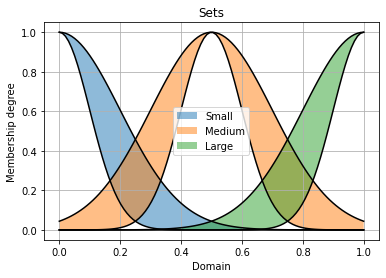

{'y1': 5.491463312635011, 'y2': 3.829641260665918}


In [ ]:
from pyit2fls import TSK, IT2FS_Gaussian_UncertStd, IT2FS_plot, \
                     product_t_norm, max_s_norm

from numpy import linspace
from time import time

domain = linspace(0., 1., 100)

Small = IT2FS_Gaussian_UncertStd(domain, [0, 0.15, 0.1, 1.])
Medium = IT2FS_Gaussian_UncertStd(domain, [0.5, 0.15, 0.1, 1.])
Large = IT2FS_Gaussian_UncertStd(domain, [1., 0.15, 0.1, 1.])
IT2FS_plot(Small, Medium, Large, title="Sets", 
           legends=["Small", "Medium", "Large"])

myIT2FLS = TSK(product_t_norm, max_s_norm)

myIT2FLS.add_input_variable("x1")
myIT2FLS.add_input_variable("x2")
myIT2FLS.add_output_variable("y1")
myIT2FLS.add_output_variable("y2")

# IF x1 is Small AND x2 is Small
# THEN y1 = x1 + 2.3 x2 + 0.5 AND y2 = 1.2 x1 + 1.5 x2 + 1.
myIT2FLS.add_rule([("x1", Small), ("x2", Small)], 
                  [("y1", {"const":0.5, "x1":1., "x2":2.3}), 
                   ("y2", {"const":1., "x1":1.2, "x2":1.5})])

# IF x1 is Medium AND x2 is Medium
# THEN y1 = 2.7 x1 + 1.9 x2 + 1. AND y2 = 2.5 x1 + 2. x2 + 1.
myIT2FLS.add_rule([("x1", Medium), ("x2", Medium)], 
                  [("y1", {"const":1., "x1":2.7, "x2":1.9}), 
                   ("y2", {"const":1., "x1":2.5, "x2":2.})])

# IF x1 is Large AND x2 is Large
# THEN y1 = 2. x1 + 3. x2 + 1. AND y2 = x1 + x2 + 2.
myIT2FLS.add_rule([("x1", Large), ("x2", Large)], 
                  [("y1", {"const":1., "x1":2., "x2":3.}), 
                   ("y2", {"const":2., "x1":1., "x2":1.})])

print(myIT2FLS.evaluate({"x1":0.9, "x2":0.9}))


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Fuzzy Inference Part 4
<br>
https://www.youtube.com/watch?v=Q6QDVIwztyU


MathWorks - Fuzzy Logic Toolbox
<br>
https://www.mathworks.com/products/fuzzy-logic.html


MathWorks - Getting Started with Fuzzy Logic Toolbox, Part 1
<br>
https://www.mathworks.com/videos/getting-started-with-fuzzy-logic-toolbox-part-1-68764.html


MathWorks - Fuzzy Inference
<br>
https://www.mathworks.com/help/fuzzy/fuzzy-inference-process.html


MathWorks - Fuzzy Logic Controller
<br>
https://www.mathworks.com/help/fuzzy/fuzzylogiccontroller.html


Math AP®︎/College Statistics Confidence intervals Confidence intervals for proportions
<br>
https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/v/conditions-for-valid-confidence-intervals

Getting Started with Fuzzy Logic Toolbox (Matlab)
<br>
https://www.youtube.com/watch?v=LupUhRJo_sU

How to work with Fuzzy Membership functions in Matlab
<br>
https://www.youtube.com/watch?v=vG3w4JVAKa0


Wikipedia - 'Fuzzy control system'
<br>
https://en.wikipedia.org/wiki/Fuzzy_control_system


Wikipedia - 'Fuzzy logic'
<br>
https://en.wikipedia.org/wiki/Fuzzy_logic

------------

[1]
Fuzzy Logic Toolbox for Python API
<br>
https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html

------------


Digitális Tankönyvtár - Fuzzy rendszerek
Kóczy T. László, Tikk Domonkos
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tkt/fuzzy-rendszerek-fuzzy/ch03.html


Digitális Tankönyvtár - A bizonytalansági következtetés egyéb módszerei
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tamop425/0026_mib_4_4/ch14s07.html


------------

Nagyon édekes Demo - Fuzzy Car Simulator
<br>
https://github.com/daniel4lee/fuzzy-system






```
# Köszönöm a figyelmet
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```
